# Data Cleaning and Visualization Overview
In the initial phase of our mini project, we focused on refining the dataset through meticulous data cleaning and visualization techniques. Our objective was to enhance the quality and coherence of the data, making it more suitable for subsequent analysis. This section encapsulates our methodology and key steps in achieving a refined dataset.

## Data Cleaning
Our data cleaning process comprised handling missing values, encoding categorical features, and ensuring data integrity. Notably, we employed strategic approaches to replace null values, fostering a more complete and robust dataset. Categorical features were encoded to numerical values, facilitating machine learning model compatibility.

## Visualization
Visualization played a pivotal role in understanding the characteristics of the data and identifying patterns. Through well-crafted plots and graphs, we delved into the distribution of features, relationships between variables, and the impact of categorical features on our target variable.

## Key Steps:
1. **Handling Null Values:** Robust techniques were employed to replace missing values, ensuring data completeness and reliability.
2. **Categorical Feature Encoding:** Transformation of categorical features into numerical representations for seamless integration into machine learning models.
3. **Strategic Plotting:** Visualization techniques such as histograms, scatter plots, and bar graphs were leveraged to gain insights into the distribution and relationships within the dataset.
<hr>

In [18]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#### Reading the Dataset ####

In [19]:
df = pd.read_csv("weatherAUS.csv")
original_df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns", None)

In [20]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

The dataset contains a total of 23 distinct features and 145,460 observations.
<hr>

#### Looking at various types of features that may be present in the given dataset ####

In [21]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


`numerical_feature`, which contains the column names of the DataFrame df where the data type is not 'O' (i.e., not an object or a string). This list includes features that are numeric in nature, such as integers or floats. There are total of 16 `numerical_feature`.

`discrete_feature` is created, which includes the features from `numerical_feature` but only those where the number of unique values is less than 25. This suggests that these features are likely to be discrete rather than continuous, as they have a relatively small number of distinct values. There are total of 2 `discrete_feature`.

`continuous_feature` list is created by taking the elements from `numerical_feature` that are not present in the discrete_feature list. These are the numerical features that are not considered discrete, implying they may have a larger range of values and are likely continuous. There are total of 14 `continuous_feature`.

`categorical_feature` list is created by taking the columns from the DataFrame df that are not in the `numerical_feature` list. These are likely features with non-numeric data types (e.g., strings or objects), suggesting they are categorical in nature. There are total of 7 `categorical_feature`.
<hr>

### Examining the percentage of null values and handling it ###

In [22]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

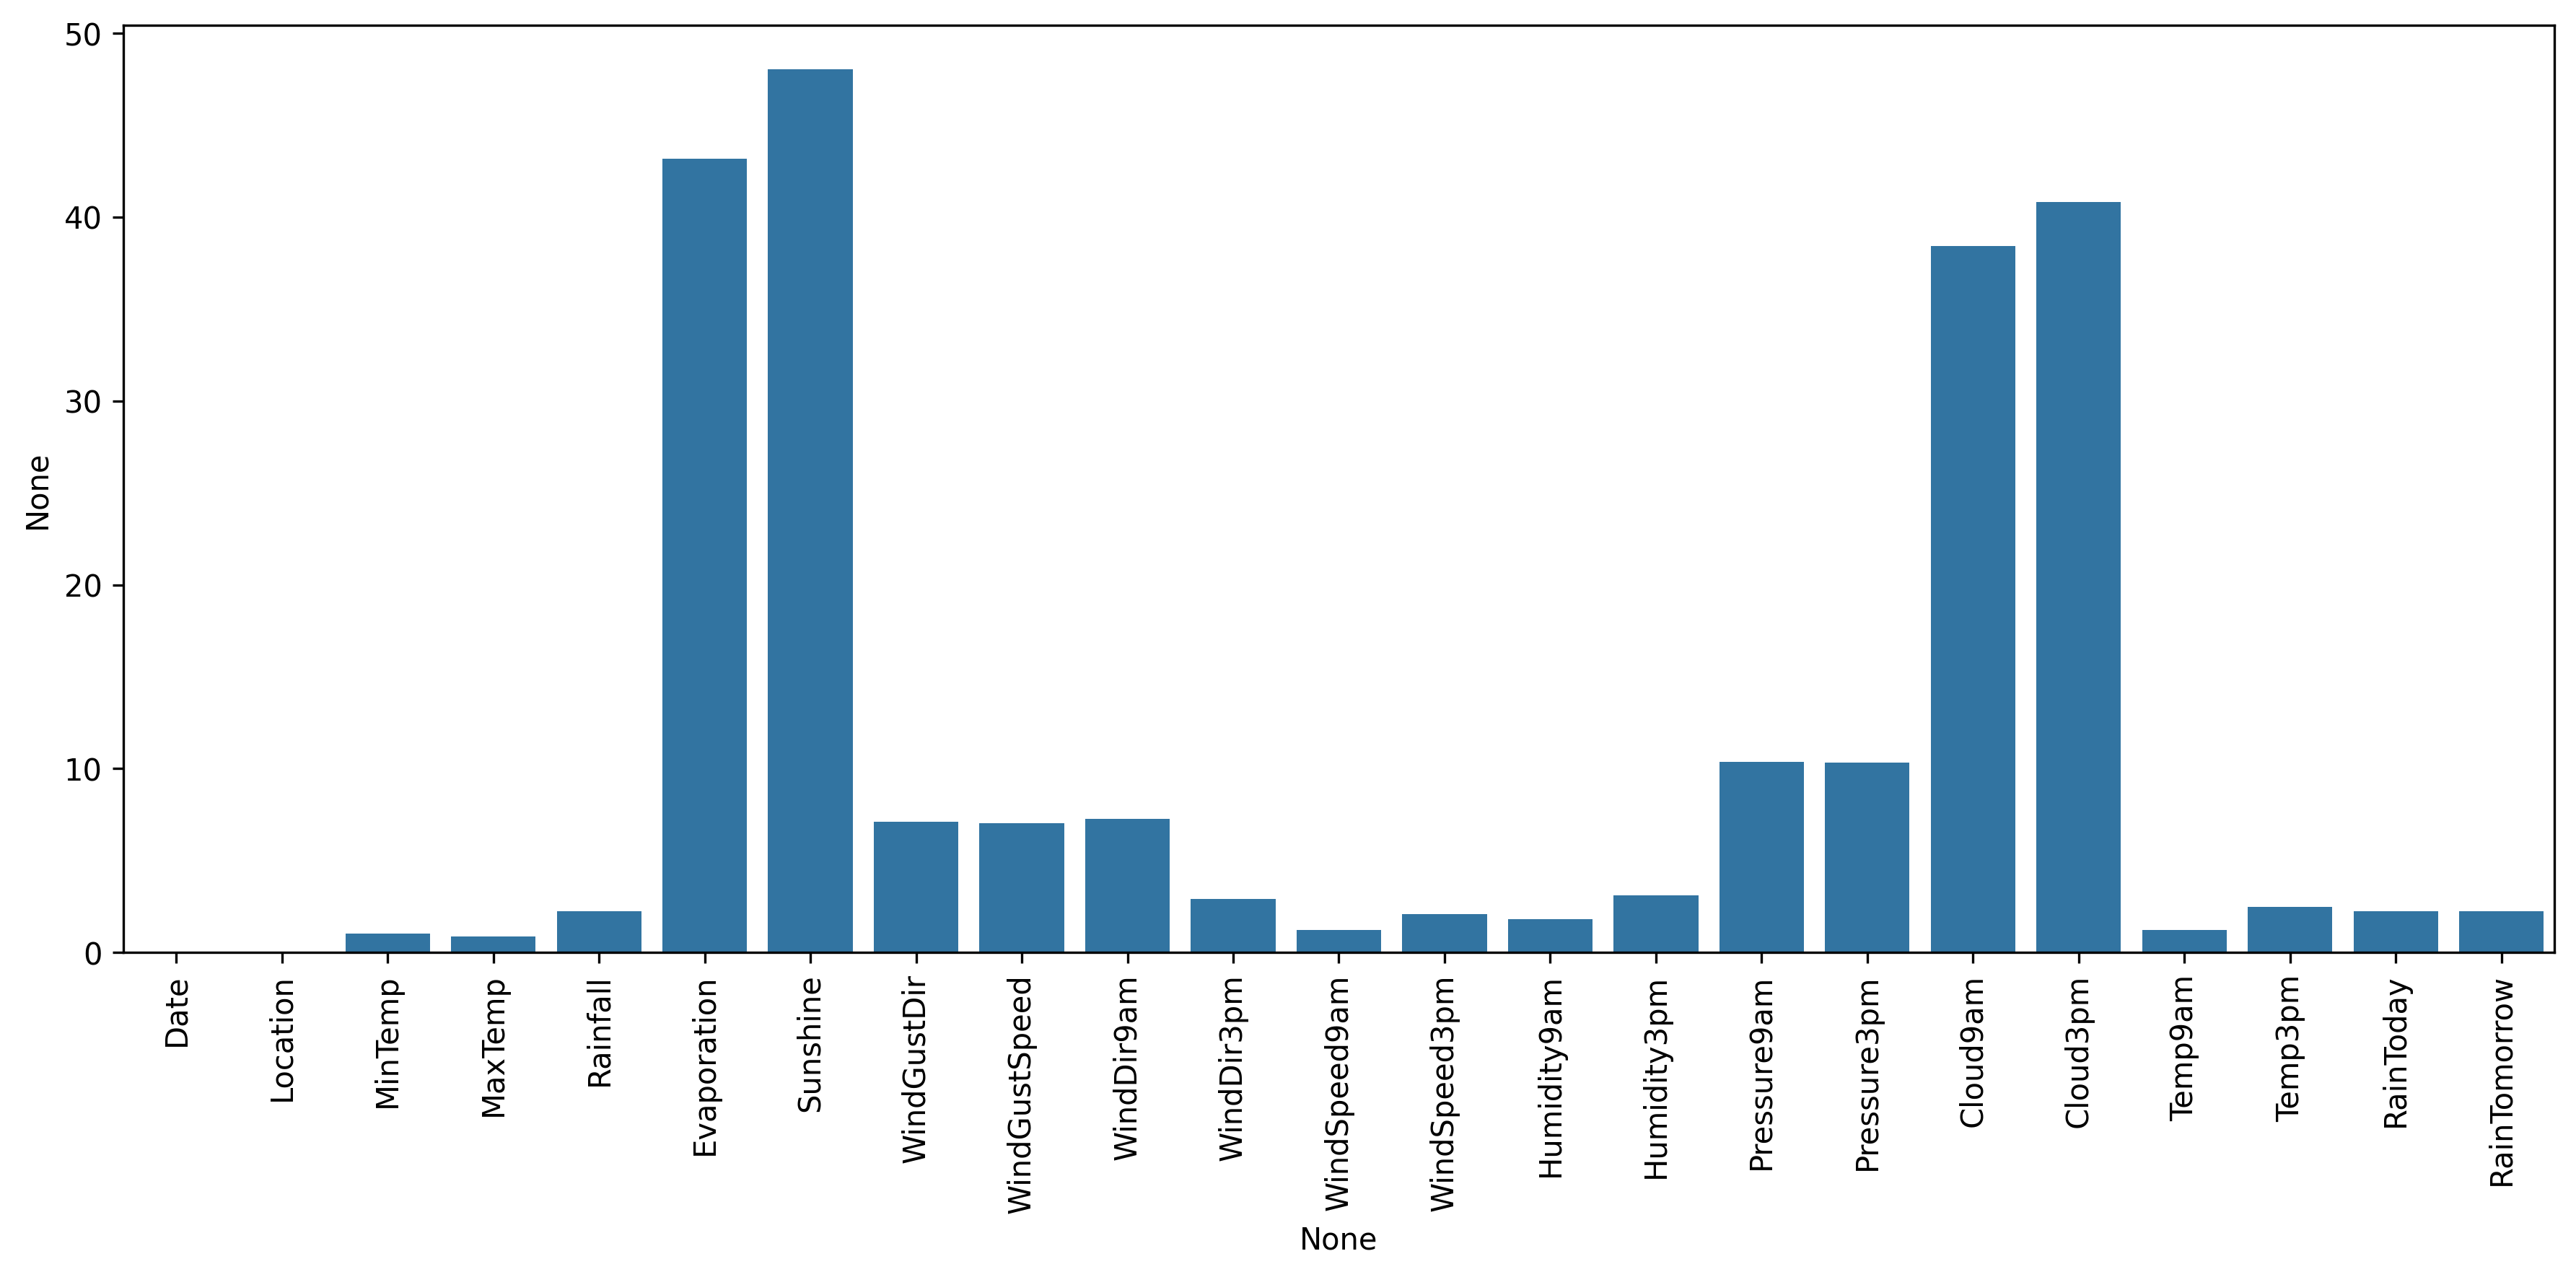

In [23]:
# Create a barplot for the column vs percentage of null values 
plt.figure(figsize=(12, 6), dpi=300)  # Adjust the figure size
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center') # to rotate the labels of x axis for better view
plt.tight_layout()

Creating a function to handle null values

In [24]:
def randomsampleimputation(df, variable):
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [25]:
# Let's look at the numerical_features
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Handling null values for the features that has approximately more than 40% of null values 
<br>
We have chosen to randomly fill these features

In [26]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")


In [27]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

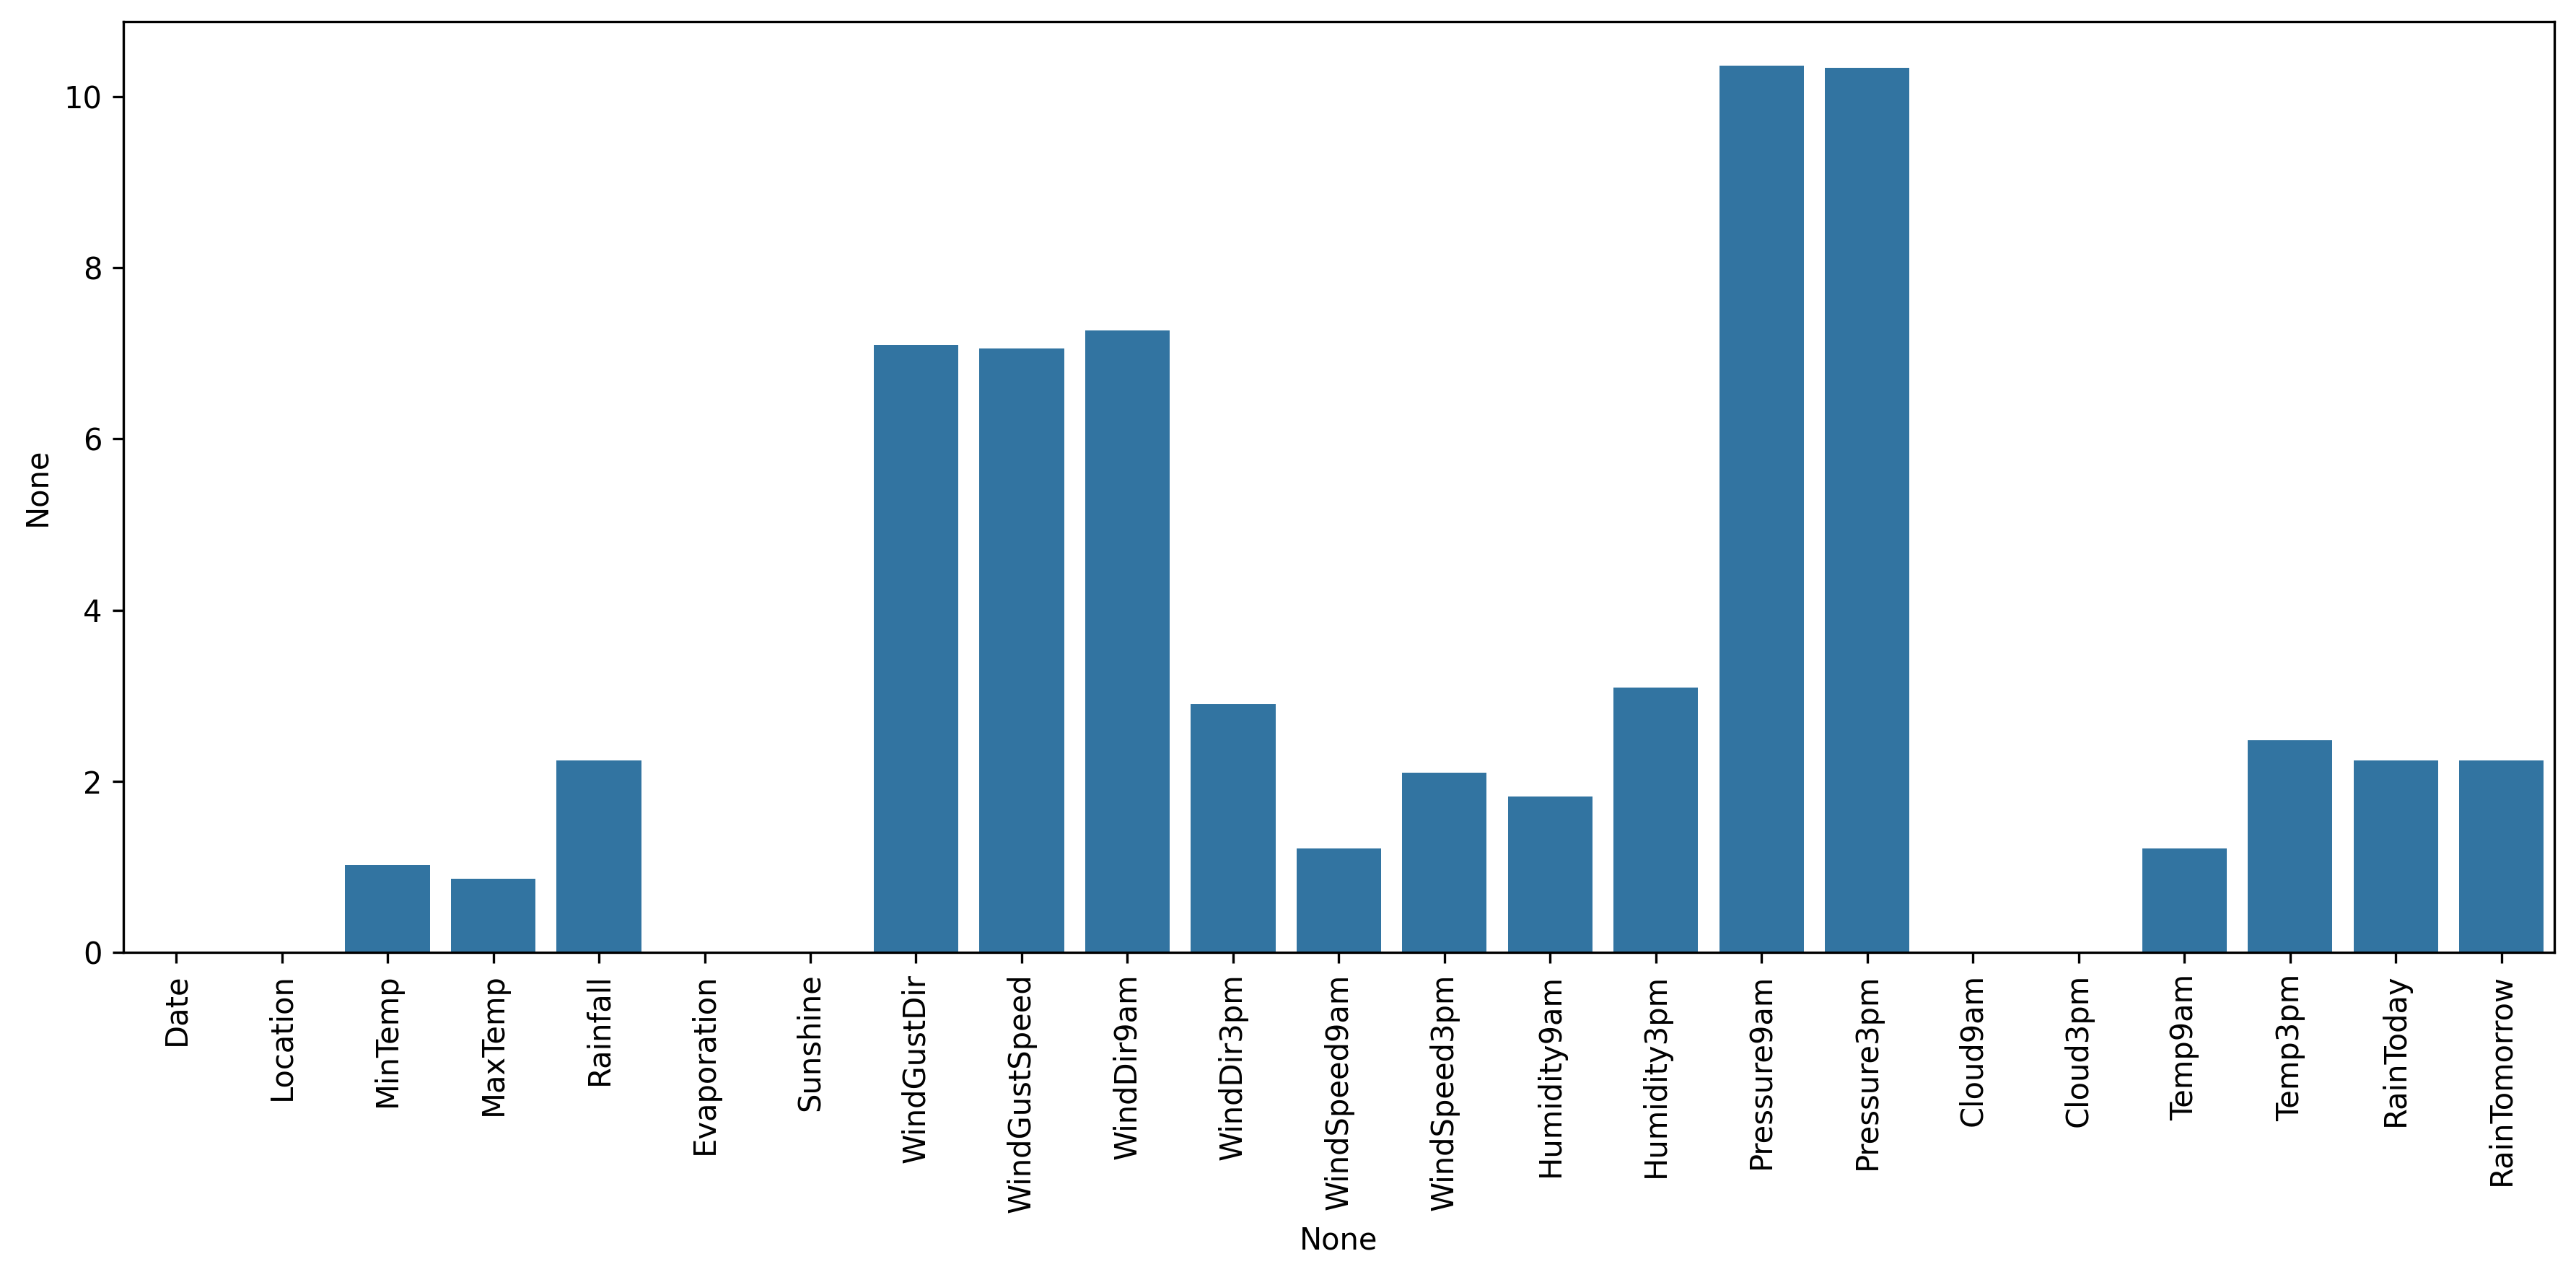

In [28]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

Next for all the continuous_feature we are replacing the null values with its median

In [29]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [30]:
null_percentage = df.isnull().sum()*100/len(df)
null_percentage

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

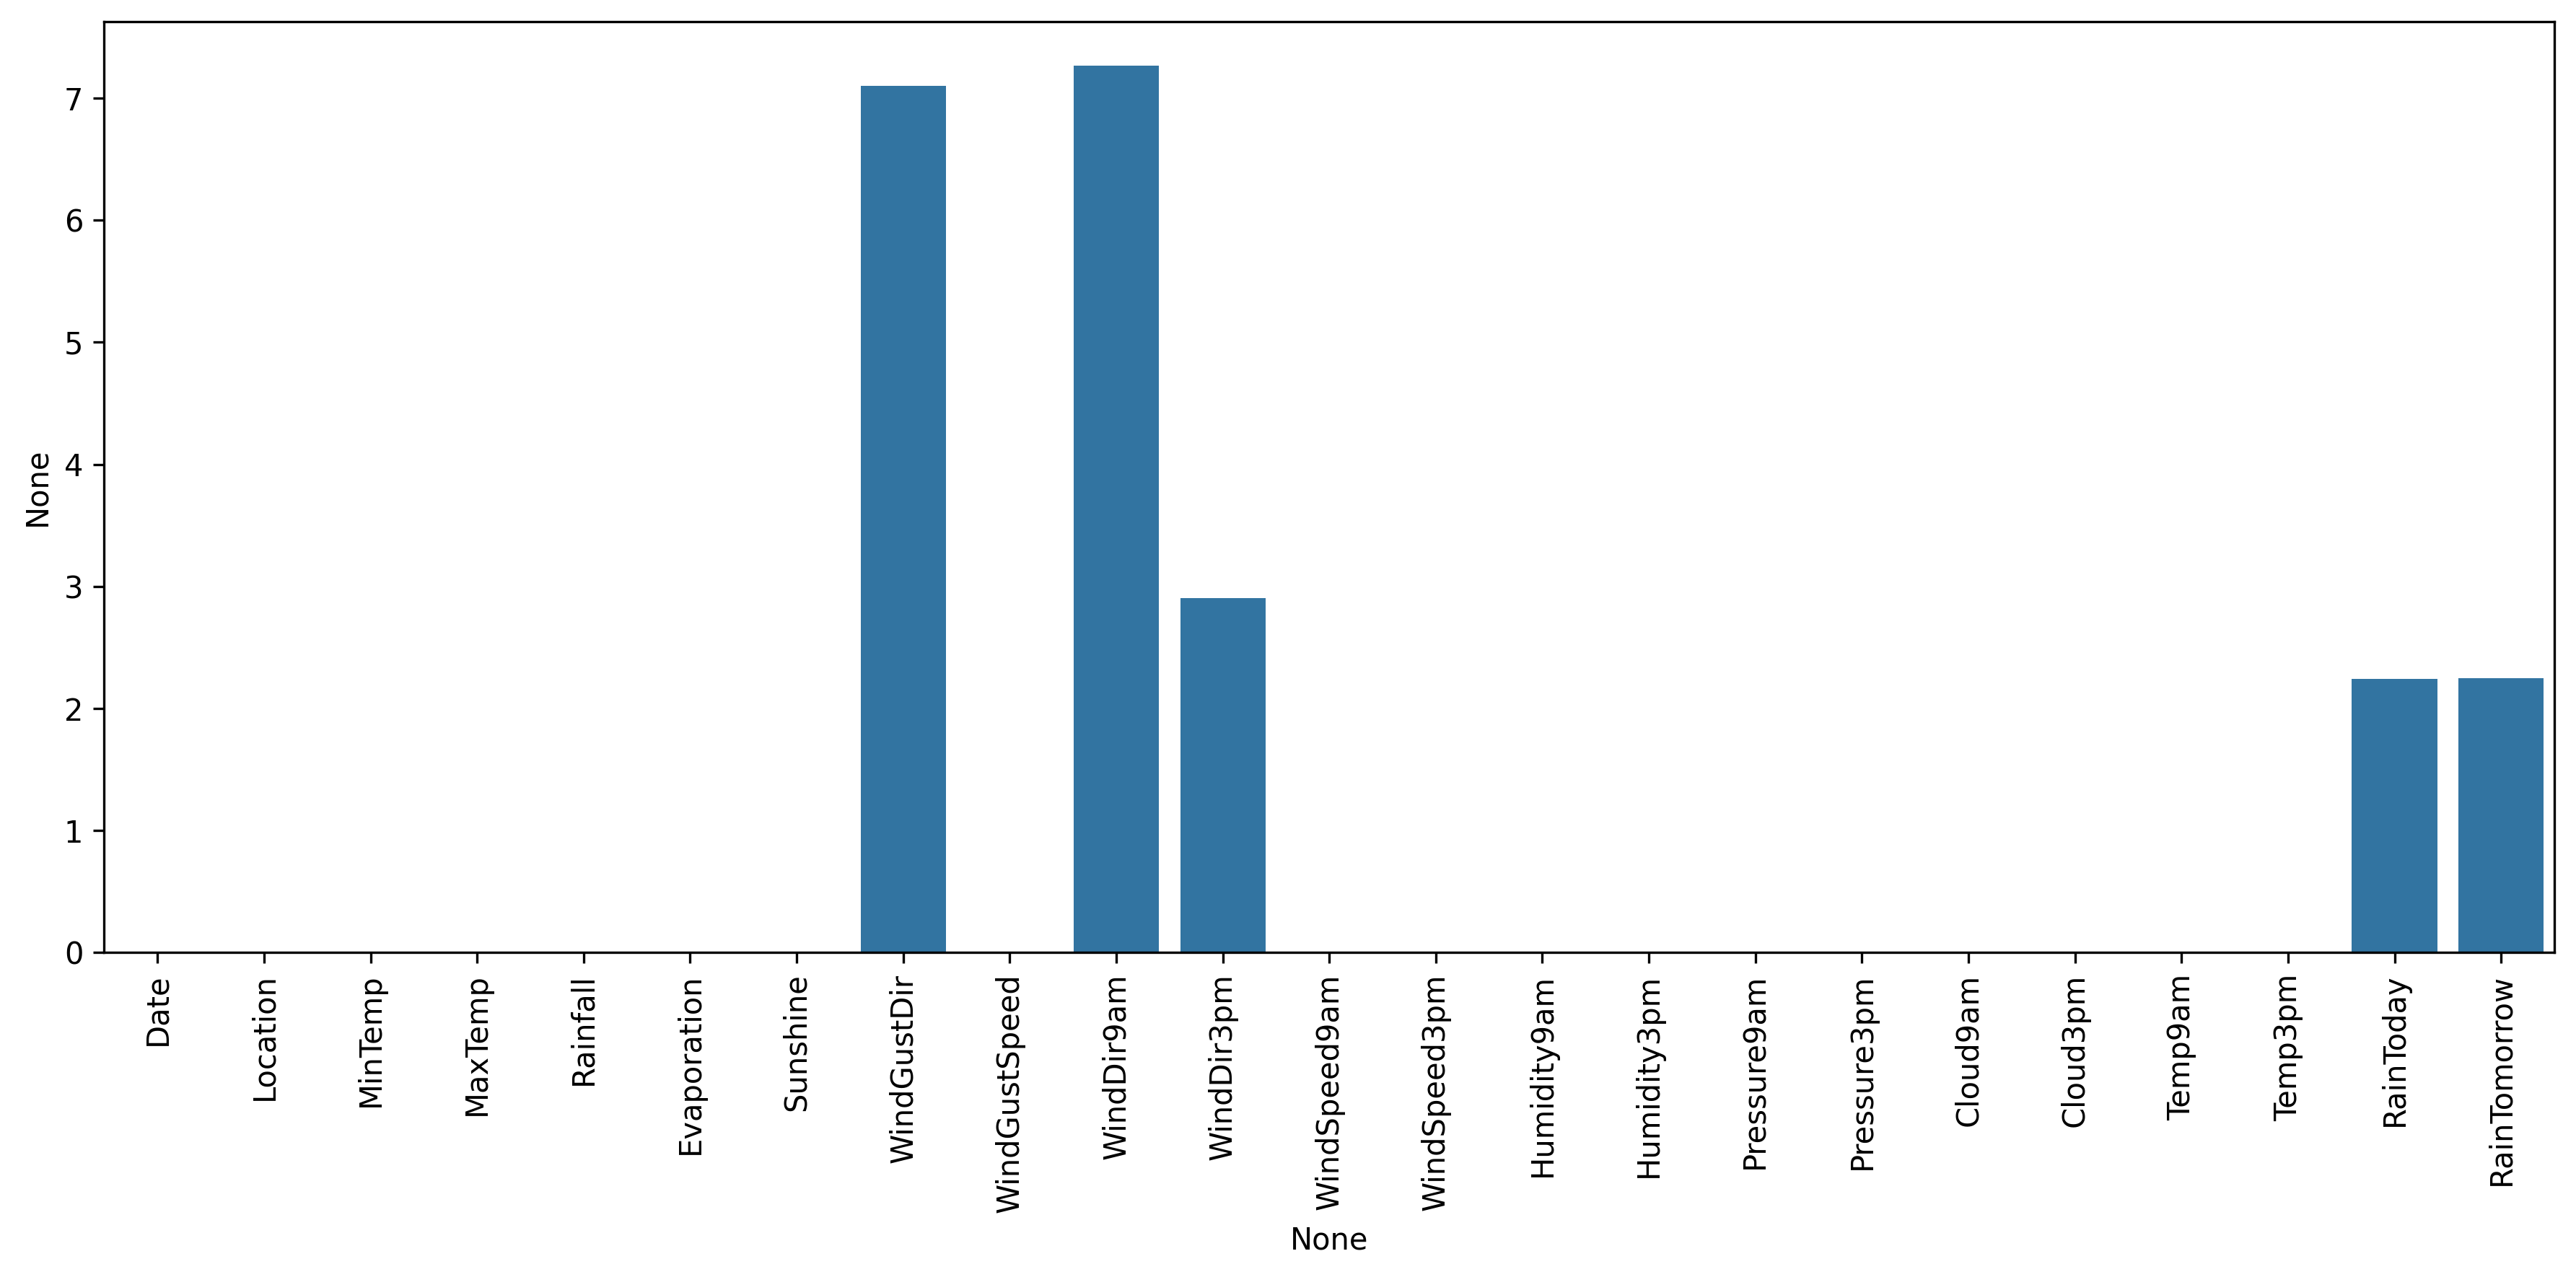

In [31]:
plt.figure(figsize=(12, 6), dpi=300)
sns.barplot(x=df.columns, y=null_percentage)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

#### We've handled the null values numeric features now we'll proceed to deal with catagorical features, we will even encode  the catagorical data along with this process ####

For the RainToday and RainTomorrow data we have either yes or no therefore we can replace this data with 0 and 1 which means no and yes respectively.

In [32]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          2.4   
1       2008-12-02   Albury      7.4     25.1       0.0          3.6   
2       2008-12-03   Albury     12.9     25.7       0.0          2.6   
3       2008-12-04   Albury      9.2     28.0       0.0         18.4   
4       2008-12-05   Albury     17.5     32.3       1.0          5.4   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          1.4   
145456  2017-06-22    Uluru      3.6     25.3       0.0          7.6   
145457  2017-06-23    Uluru      5.4     26.9       0.0          6.8   
145458  2017-06-24    Uluru      7.8     27.0       0.0          2.6   
145459  2017-06-25    Uluru     14.9     22.6       0.0          1.4   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            8.3           W           44.0          W        WNW   
1           10.0         WNW           44.0        NNW        WSW   
2            4.4         WSW           46.0          W        WSW   
3            8.9          NE           24.0         SE          E   
4            3.0           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       7.8           E           31.0         SE        ENE   
145456      13.5         NNW           22.0         SE          N   
145457      11.0           N           37.0         SE        WNW   
145458      13.2          SE           28.0        SSE          N   
145459       0.7         NaN           39.0        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       0.0     16.9     21.8      False   
1            1007.8       7.0       1.0     17.2     24.3      False   
2            1008.7       8.0       2.0     21.0     23.2      False   
3            1012.8       0.0       5.0     18.1     26.5      False   
4            1006.0       7.0       8.0     17.8     29.7      False   
...             ...       ...       ...      ...      ...        ...   
145455       1020.3       1.0       1.0     10.1     22.4      False   
145456       1019.1       8.0       5.0     10.9     24.5      False   
145457       1016.8       8.0       1.0     12.5     26.1      False   
145458       1016.5       3.0       2.0     15.1     26.0      False   
145459       1017.9       8.0       8.0     15.0     20.9      False   

        RainTomorrow  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
145455         False  
145456         False  
145457         False  
145458         False  
145459         False  

[145460 rows x 23 columns]

RainToday and RainTomorrow feature is now replaced by True or False

For the features like WindGustDir, WindDir9am and WindDir3pm null values are replaced by the value which has the max frequency.<br>
First let's look at the values these features contains

In [33]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

Now let's map these data with some numbers

In [34]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10, 'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10, 'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10, 'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

Now let's fill the null values with the value which has the maximum frequency.

In [35]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

Let's look whether do we still have any null values

In [36]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

Seems like we've dealt with all the null values in the given data

Let's look at the dataframe

In [37]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          2.4   
1       2008-12-02   Albury      7.4     25.1       0.0          3.6   
2       2008-12-03   Albury     12.9     25.7       0.0          2.6   
3       2008-12-04   Albury      9.2     28.0       0.0         18.4   
4       2008-12-05   Albury     17.5     32.3       1.0          5.4   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          1.4   
145456  2017-06-22    Uluru      3.6     25.3       0.0          7.6   
145457  2017-06-23    Uluru      5.4     26.9       0.0          6.8   
145458  2017-06-24    Uluru      7.8     27.0       0.0          2.6   
145459  2017-06-25    Uluru     14.9     22.6       0.0          1.4   

        Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0            8.3          4.0           44.0         5.0         3.0   
1           10.0          2.0           44.0         0.0         6.0   
2            4.4          5.0           46.0         5.0         6.0   
3            8.9         11.0           24.0        13.0        14.0   
4            3.0          4.0           41.0        12.0         0.0   
...          ...          ...            ...         ...         ...   
145455       7.8         15.0           31.0        13.0        13.0   
145456      13.5          0.0           22.0        13.0         2.0   
145457      11.0          3.0           37.0        13.0         3.0   
145458      13.2         12.0           28.0        11.0         2.0   
145459       0.7          4.0           39.0        14.0        15.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       0.0     16.9     21.8      False   
1            1007.8       7.0       1.0     17.2     24.3      False   
2            1008.7       8.0       2.0     21.0     23.2      False   
3            1012.8       0.0       5.0     18.1     26.5      False   
4            1006.0       7.0       8.0     17.8     29.7      False   
...             ...       ...       ...      ...      ...        ...   
145455       1020.3       1.0       1.0     10.1     22.4      False   
145456       1019.1       8.0       5.0     10.9     24.5      False   
145457       1016.8       8.0       1.0     12.5     26.1      False   
145458       1016.5       3.0       2.0     15.1     26.0      False   
145459       1017.9       8.0       8.0     15.0     20.9      False   

        RainTomorrow  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
145455         False  
145456         False  
145457         False  
145458         False  
145459         False  

[145460 rows x 23 columns]

##### Our next task is to map location feature

Our approach for mapping these locations involves replacing them with the values corresponding to the locations where 'RainTomorrow' is most frequently observed to be true.

In [38]:
# let's create a dataframe which shows weather it will rain tomorrow or not according to the places
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df1

RainTomorrow      False  True 
Location                      
Adelaide           2505    688
Albany             2138    902
Albury             2422    618
AliceSprings       2796    244
BadgerysCreek      2426    583
Ballarat           2259    781
Bendigo            2478    562
Brisbane           2484    709
Cairns             2090    950
Canberra           2807    629
Cobar              2623    386
CoffsHarbour       2140    869
Dartmoor           2087    922
Darwin             2341    852
GoldCoast          2265    775
Hobart             2432    761
Katherine          1313    265
Launceston         2341    699
Melbourne          2557    636
MelbourneAirport   2356    653
Mildura            2682    327
Moree              2615    394
MountGambier       2120    920
MountGinini        2221    819
Newcastle          2308    731
Nhil               1336    242
NorahHead          2196    808
NorfolkIsland      2090    919
Nuriootpa          2417    592
PearceRAAF         2504    505
Penrith            2444    595
Perth              2548    645
PerthAirport       2442    567
Portland           1914   1095
Richmond           2449    560
Sale               2366    643
SalmonGums         2529    472
Sydney             2479    865
SydneyAirport      2235    774
Townsville         2521    519
Tuggeranong        2471    568
Uluru              1462    116
WaggaWagga         2473    536
Walpole            2057    949
Watsonia           2271    738
Williamtown        2309    700
Witchcliffe        2130    879
Wollongong         2327    713
Woomera            2807    202

In [39]:
# sort the values to see where it rained the most
df1[True].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [40]:
# Let's look at all the places this data has
df1[True].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

Now let's encode these locations, we need to remember these encoded values as it will be required in the web application we will build in future.

In [41]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

The date column is curruntly no use to us so we will extract the month from the date and make it as a new feature.<br>This what is done in our base paper as well

In [42]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d", errors="coerce")

df["Date_month"] = df["Date"].dt.month


In [43]:
# now let's look at the datarame
df

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01        30     13.4     22.9       0.6          2.4   
1      2008-12-02        30      7.4     25.1       0.0          3.6   
2      2008-12-03        30     12.9     25.7       0.0          2.6   
3      2008-12-04        30      9.2     28.0       0.0         18.4   
4      2008-12-05        30     17.5     32.3       1.0          5.4   
...           ...       ...      ...      ...       ...          ...   
145455 2017-06-21        49      2.8     23.4       0.0          1.4   
145456 2017-06-22        49      3.6     25.3       0.0          7.6   
145457 2017-06-23        49      5.4     26.9       0.0          6.8   
145458 2017-06-24        49      7.8     27.0       0.0          2.6   
145459 2017-06-25        49     14.9     22.6       0.0          1.4   

        Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  \
0            8.3          4.0           44.0         5.0         3.0   
1           10.0          2.0           44.0         0.0         6.0   
2            4.4          5.0           46.0         5.0         6.0   
3            8.9         11.0           24.0        13.0        14.0   
4            3.0          4.0           41.0        12.0         0.0   
...          ...          ...            ...         ...         ...   
145455       7.8         15.0           31.0        13.0        13.0   
145456      13.5          0.0           22.0        13.0         2.0   
145457      11.0          3.0           37.0        13.0         3.0   
145458      13.2         12.0           28.0        11.0         2.0   
145459       0.7          4.0           39.0        14.0        15.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0            1007.1       8.0       0.0     16.9     21.8      False   
1            1007.8       7.0       1.0     17.2     24.3      False   
2            1008.7       8.0       2.0     21.0     23.2      False   
3            1012.8       0.0       5.0     18.1     26.5      False   
4            1006.0       7.0       8.0     17.8     29.7      False   
...             ...       ...       ...      ...      ...        ...   
145455       1020.3       1.0       1.0     10.1     22.4      False   
145456       1019.1       8.0       5.0     10.9     24.5      False   
145457       1016.8       8.0       1.0     12.5     26.1      False   
145458       1016.5       3.0       2.0     15.1     26.0      False   
145459       1017.9       8.0       8.0     15.0     20.9      False   

        RainTomorrow  Date_month  
0              False          12  
1              False          12  
2              False          12  
3              False          12  
4              False          12  
...              ...         ...  
145455         False           6  
145456         False           6  
145457         False           6  
145458         False           6  
145459         False           6  

[145460 rows x 24 columns]

now let's drop the data column as it's of no use to us

In [44]:
df = df.drop('Date', axis=1)

#### Creating a data set which will not contain the outliers

In [46]:
# df.to_csv("preprocessed_with_outliers.csv", index=False)

### We've finally dealt with all the null values and successfully encoded all the catagoriacal data ###
<hr>

## Dealing with Outliers ##

Let's plot a boxplot graph to see the outliers, same approach is followed in our base paper

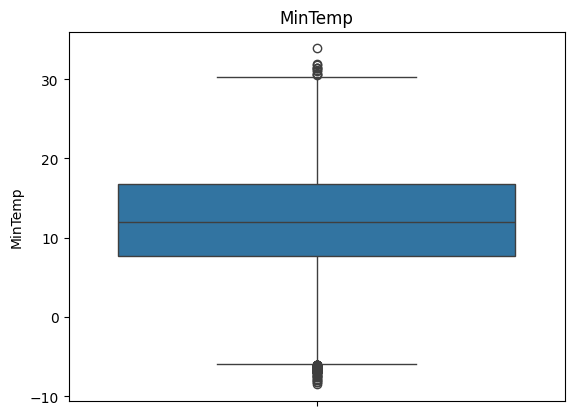

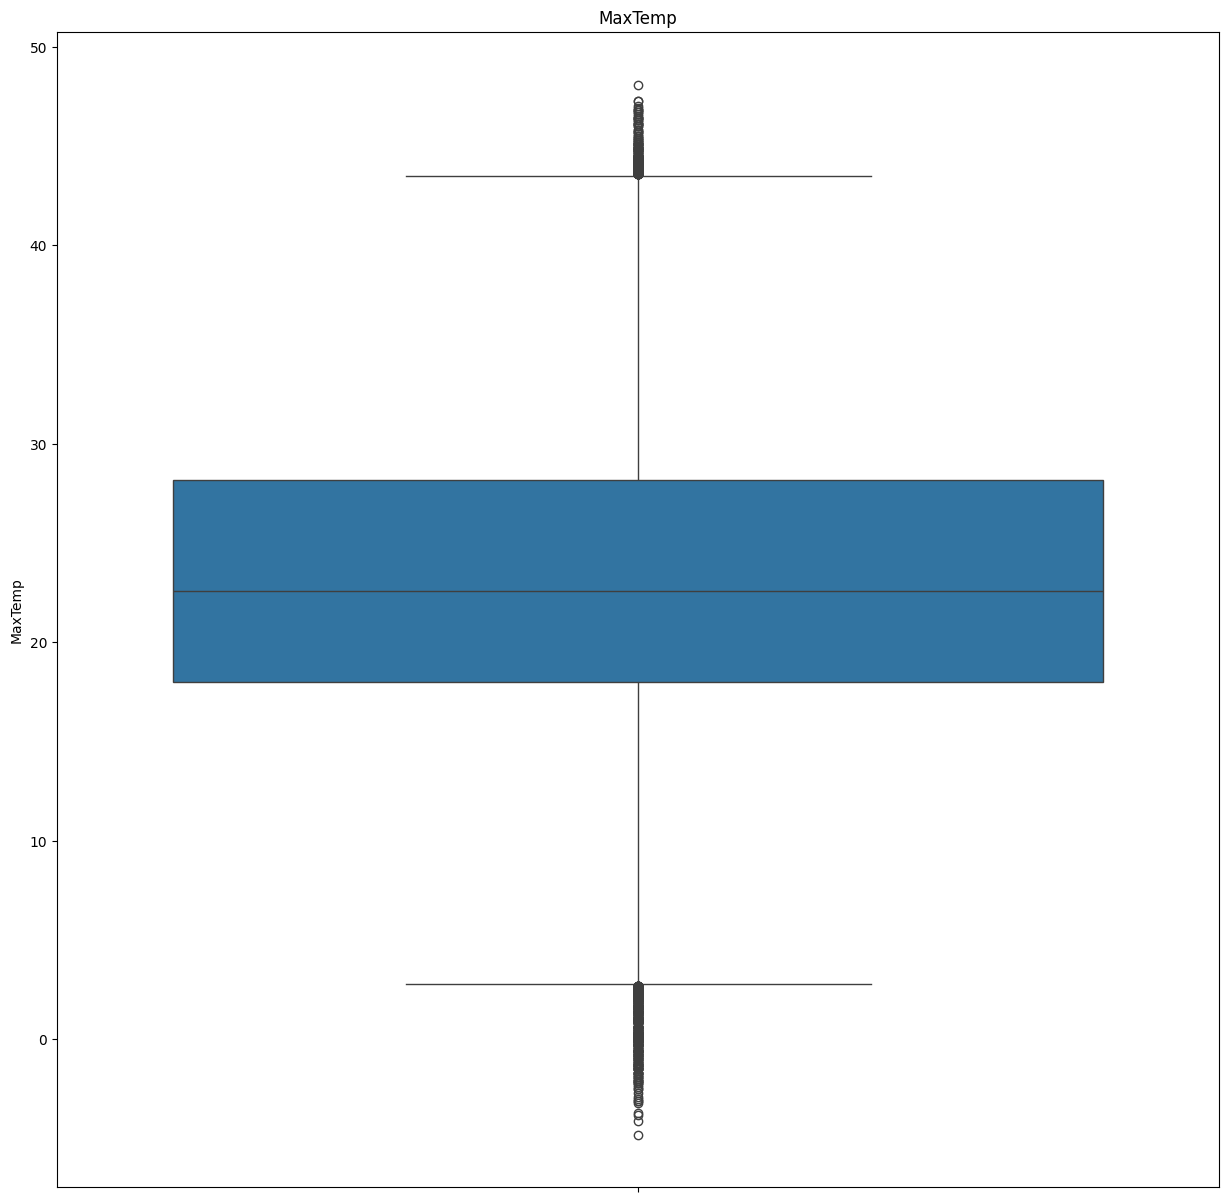

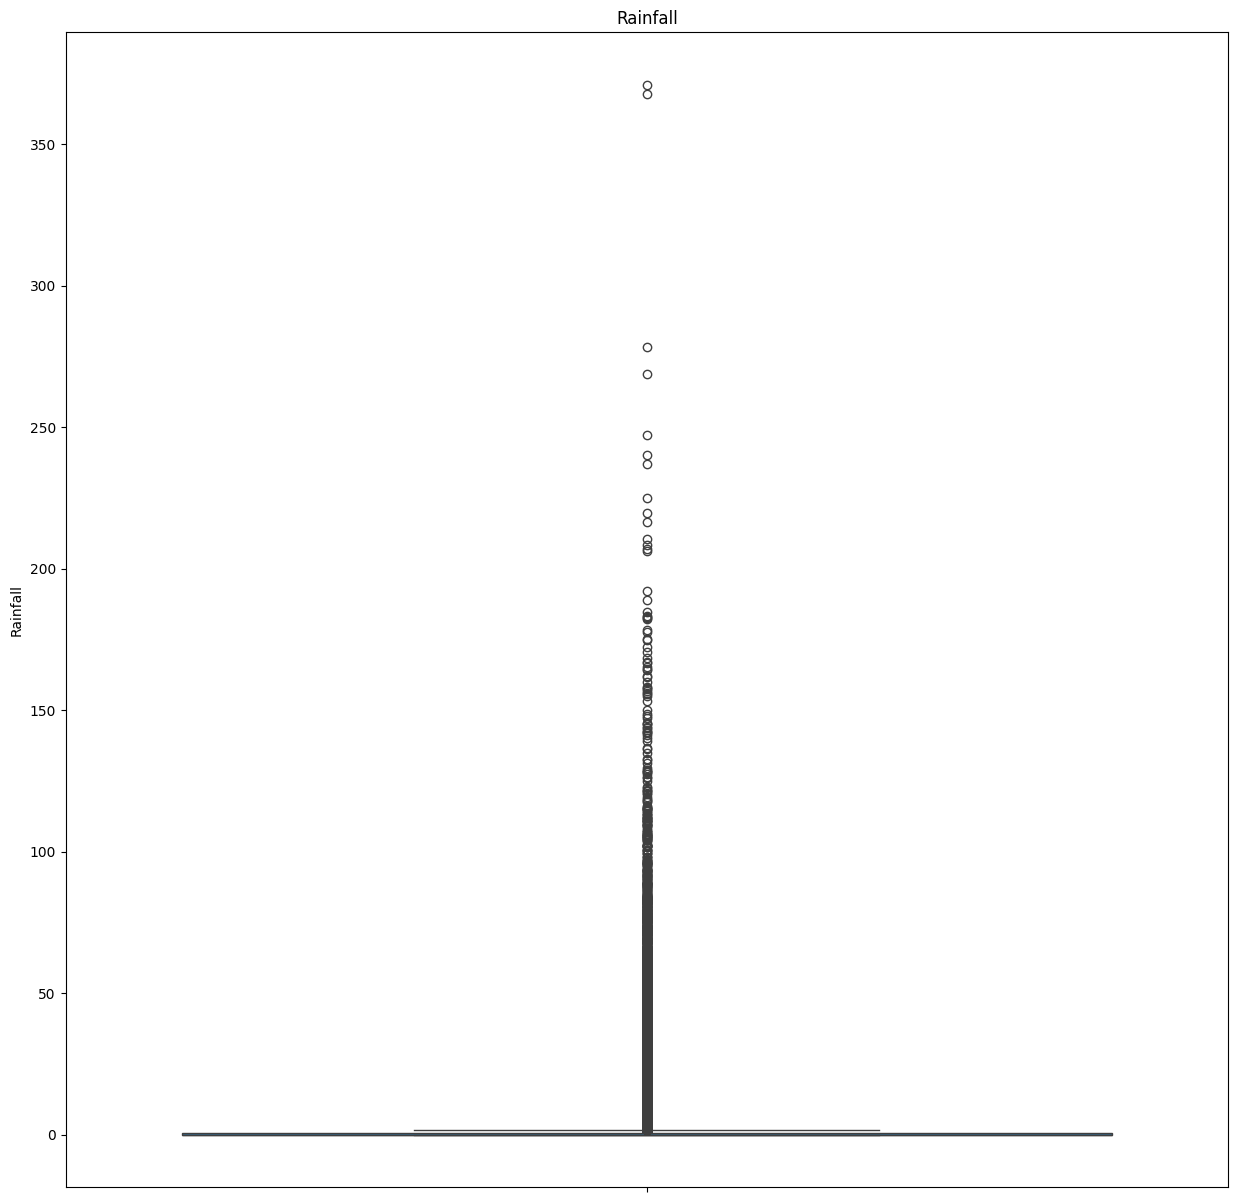

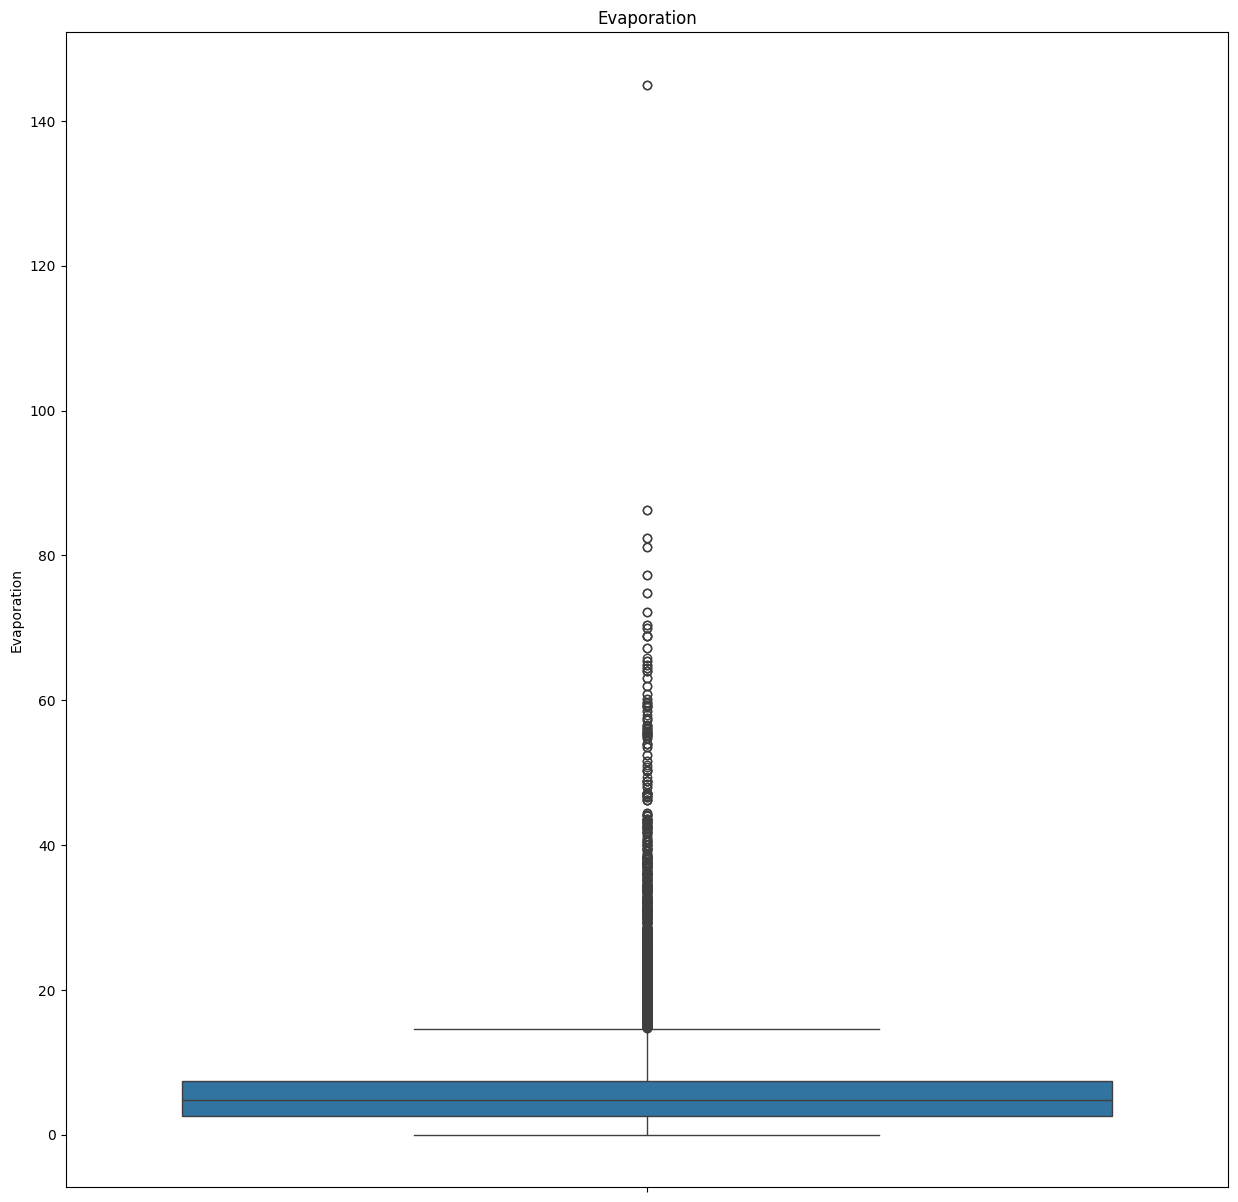

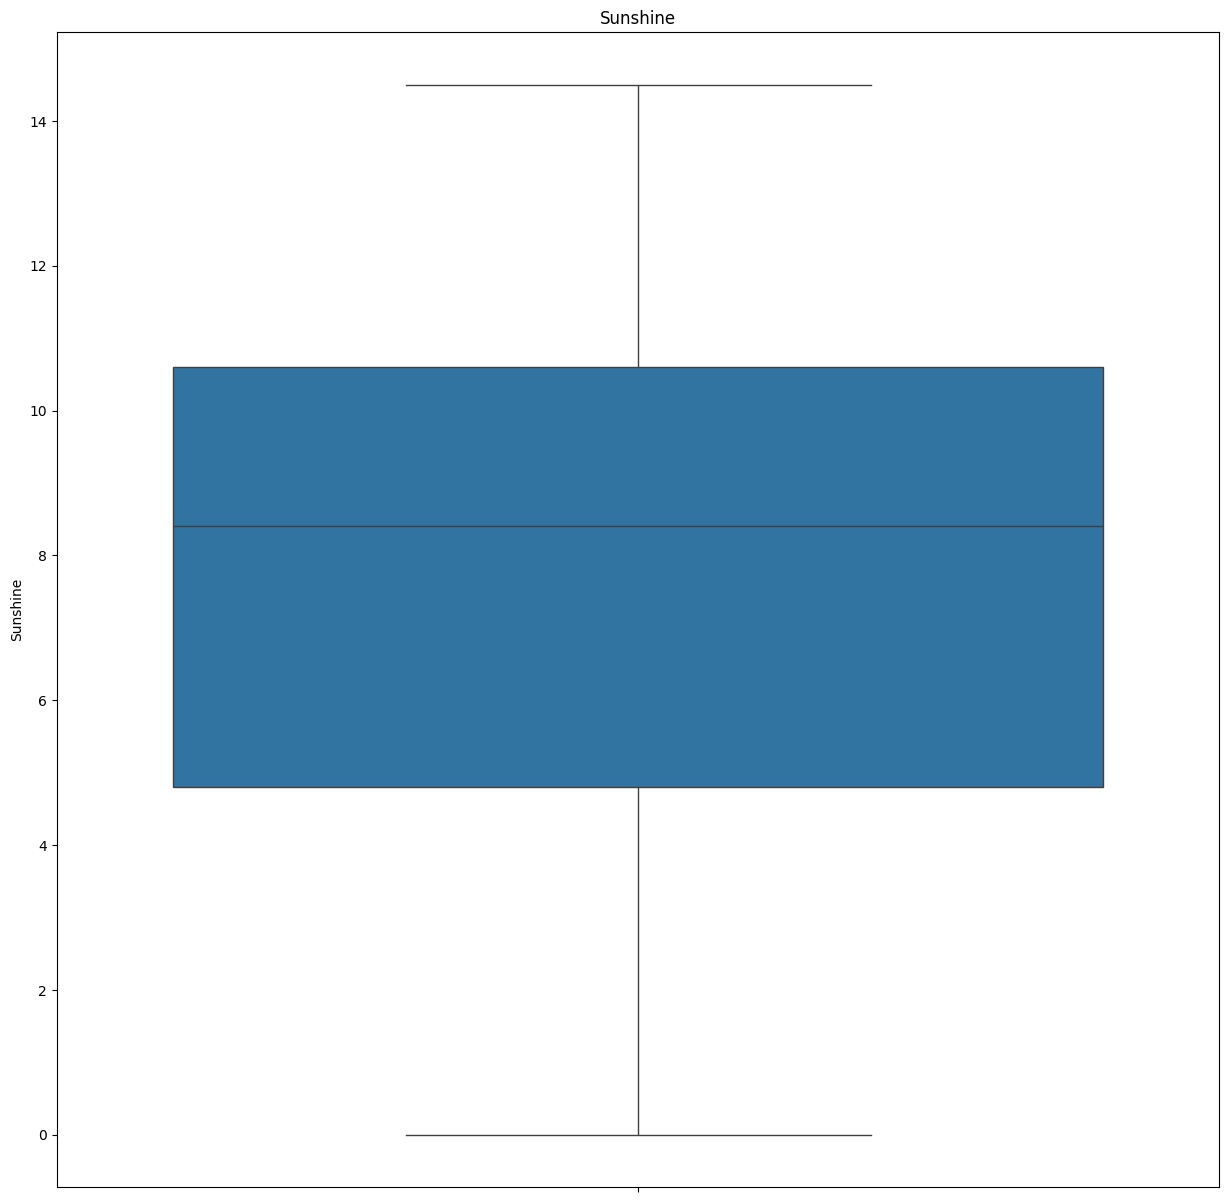

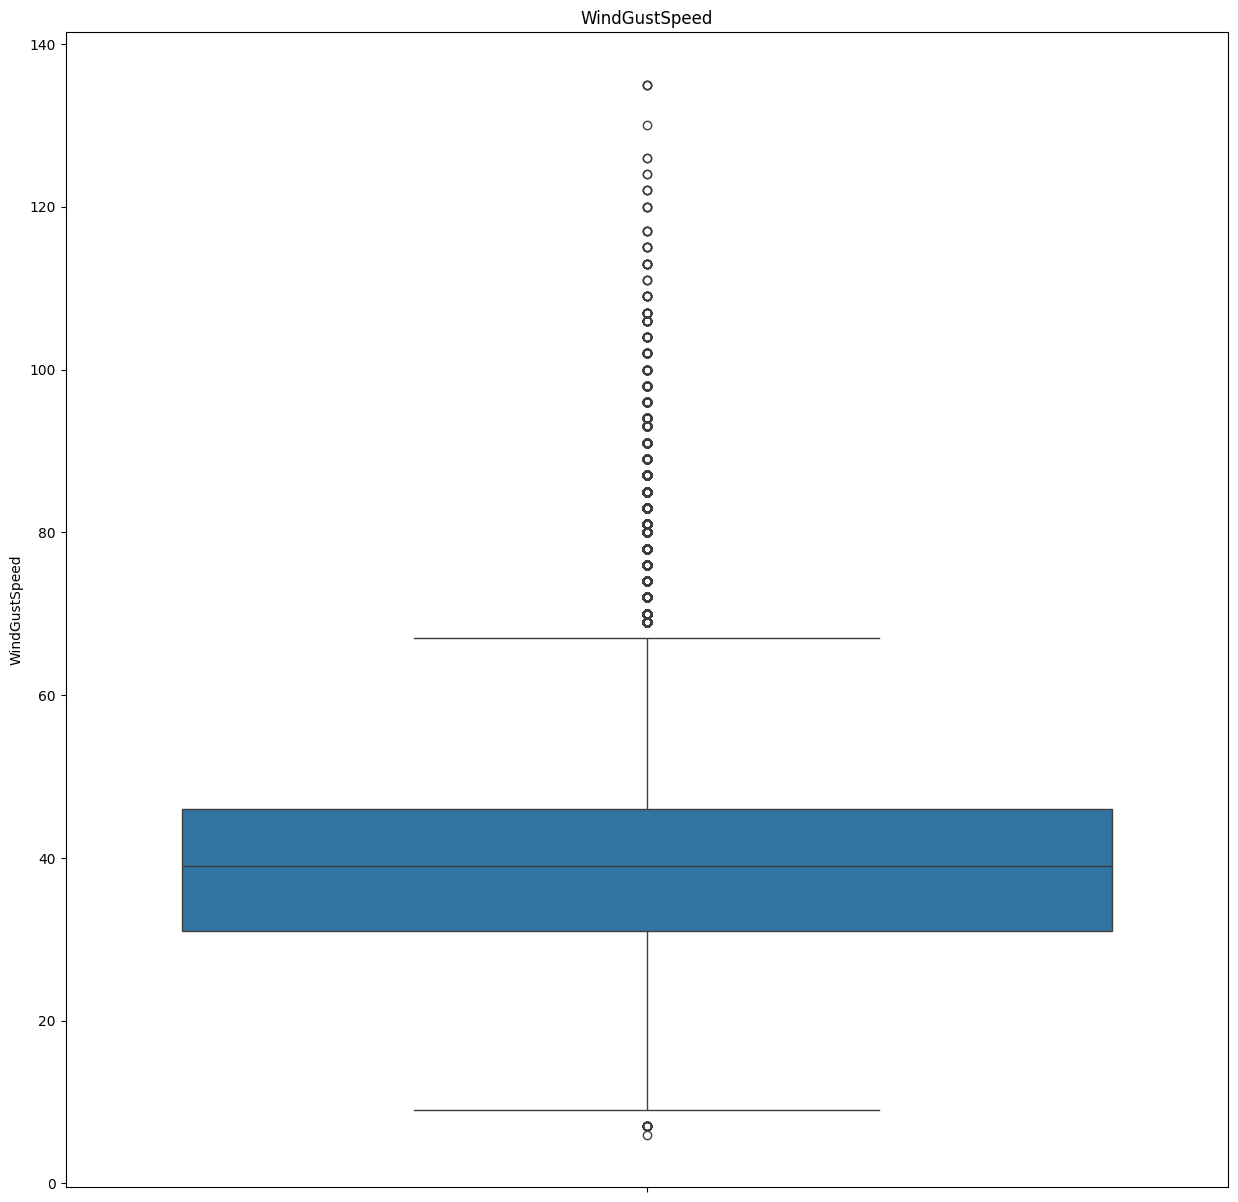

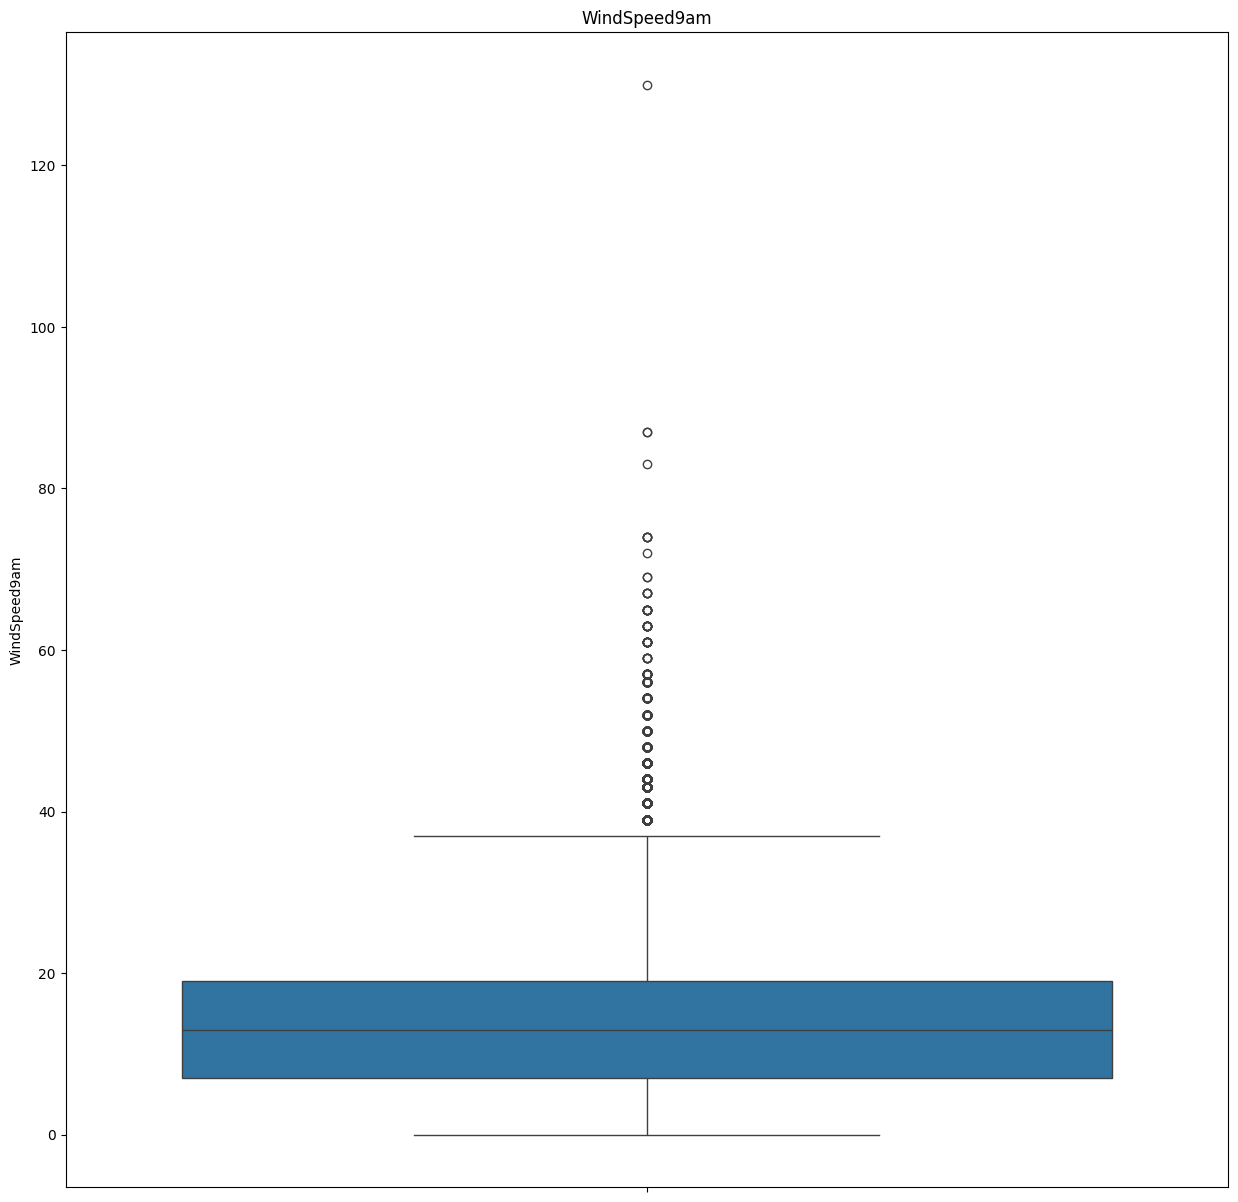

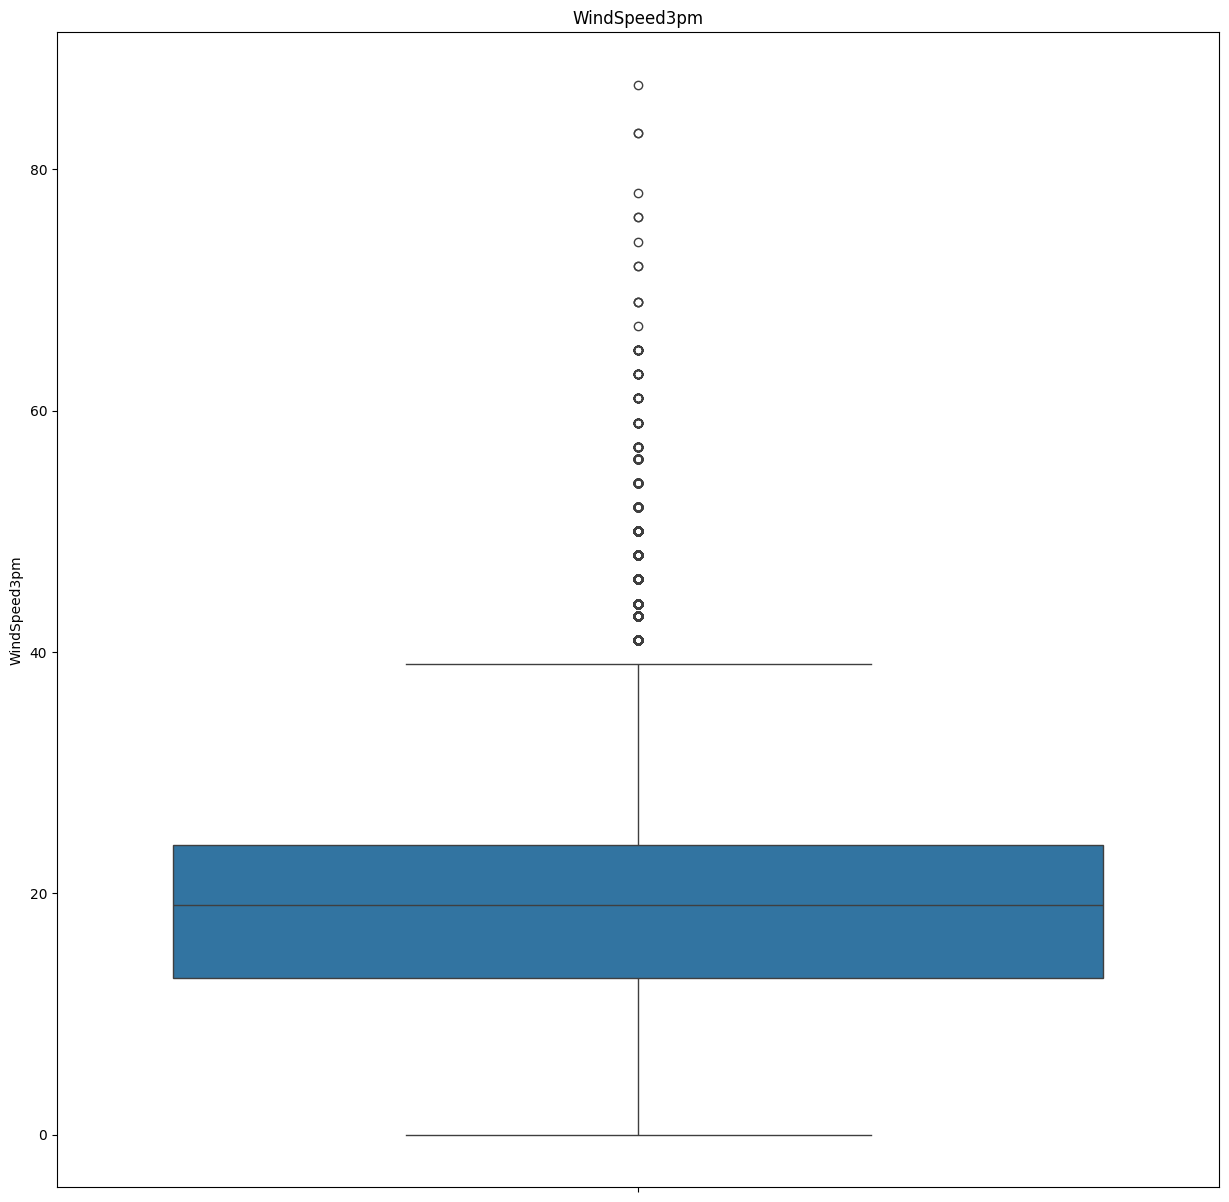

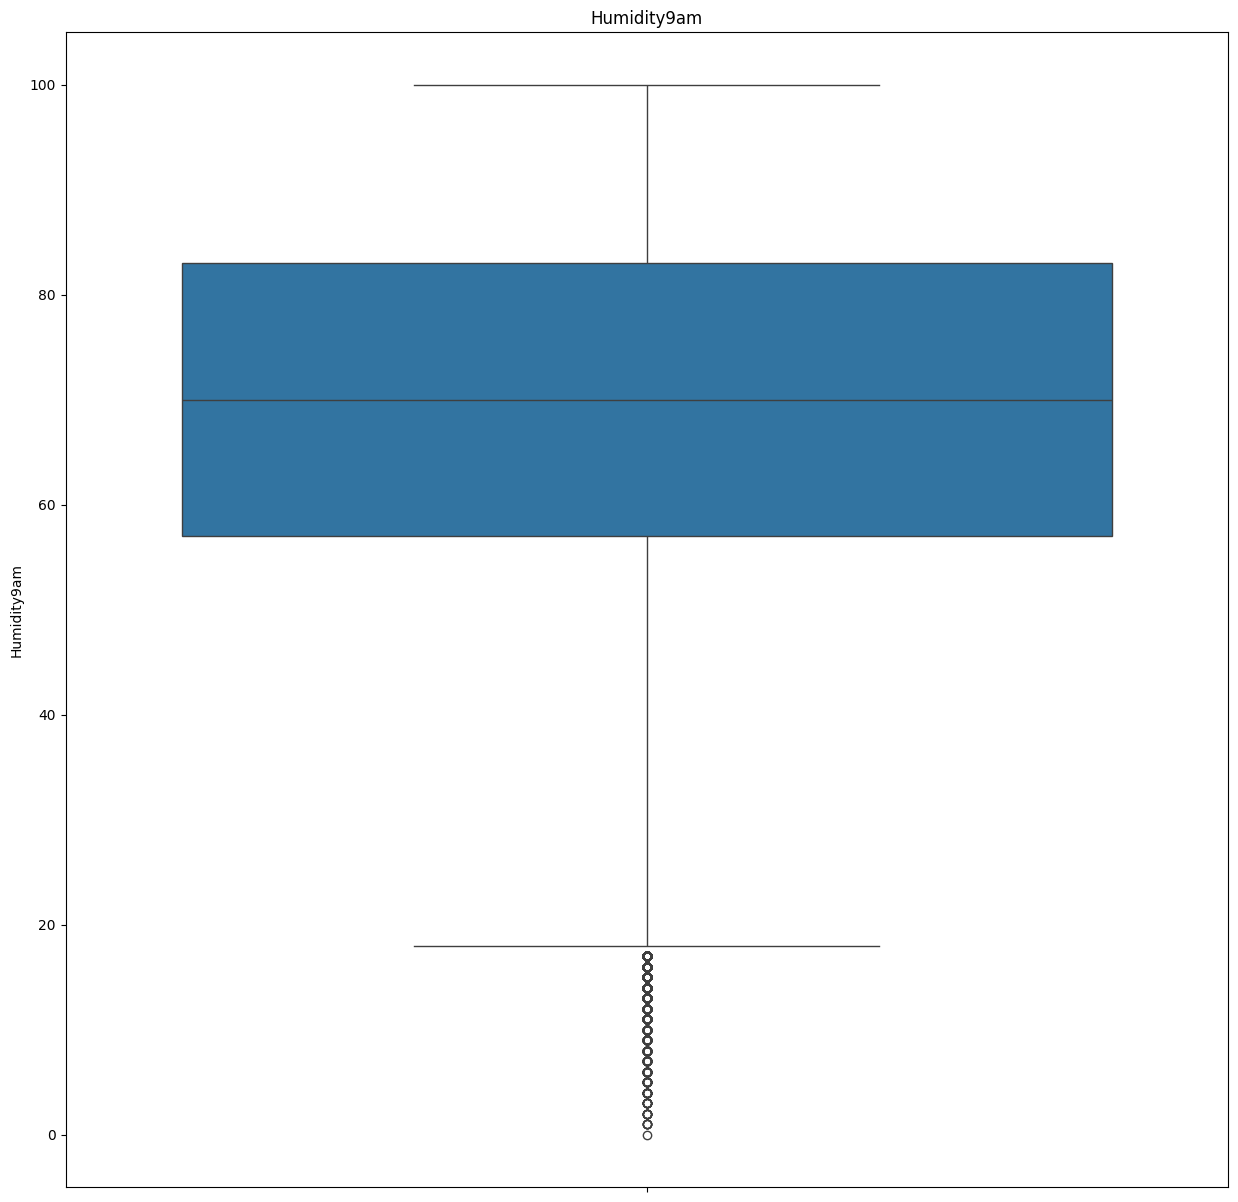

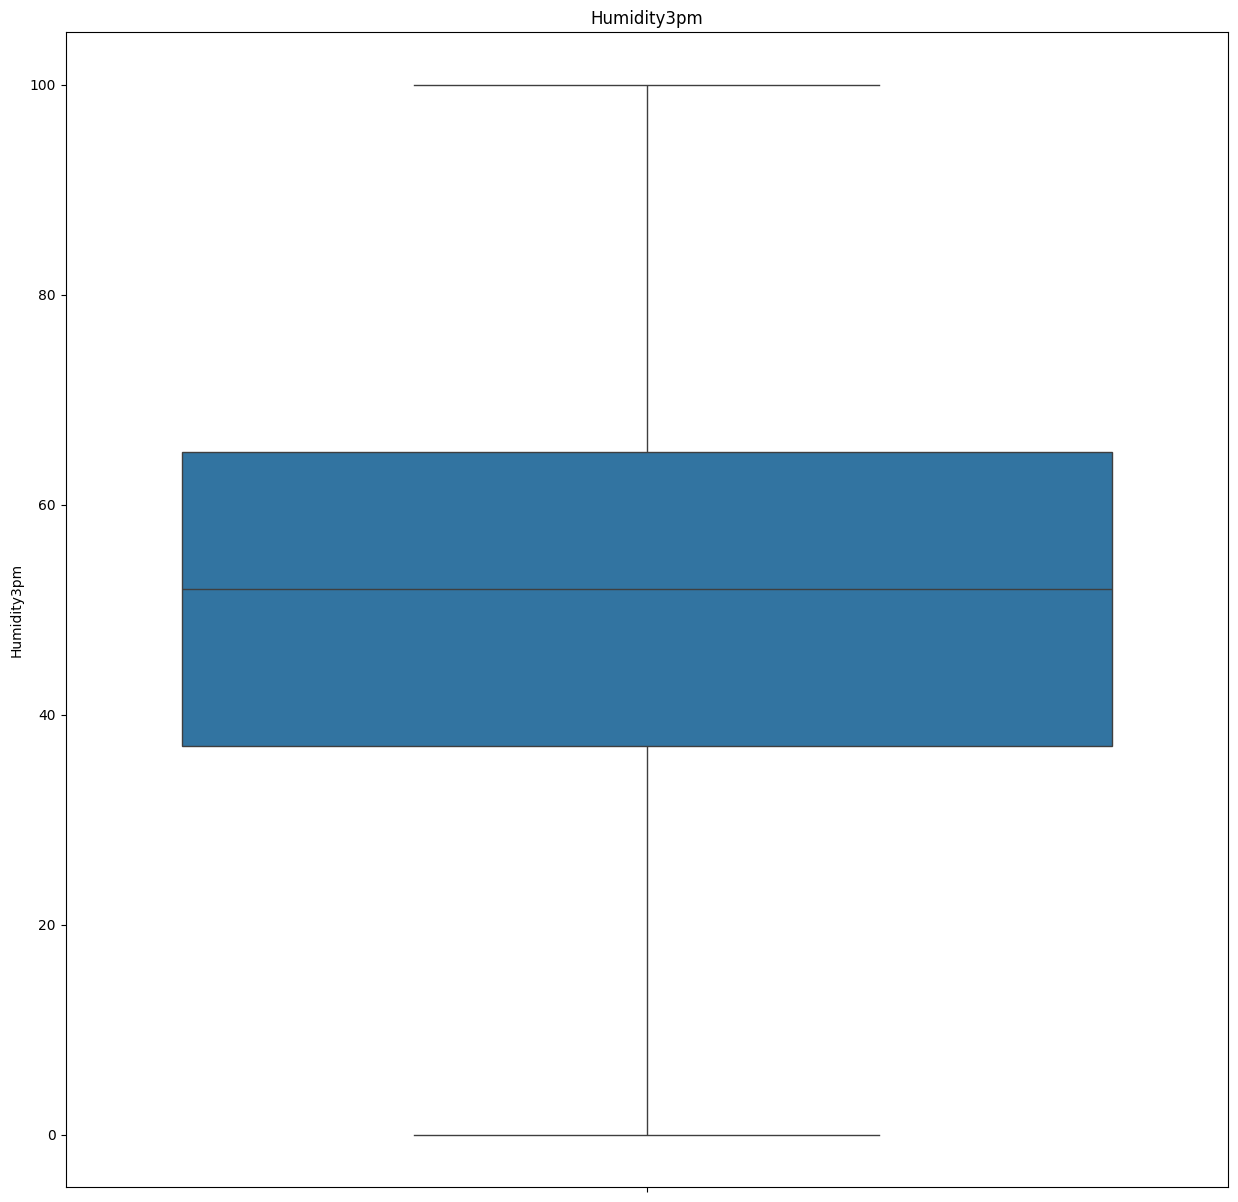

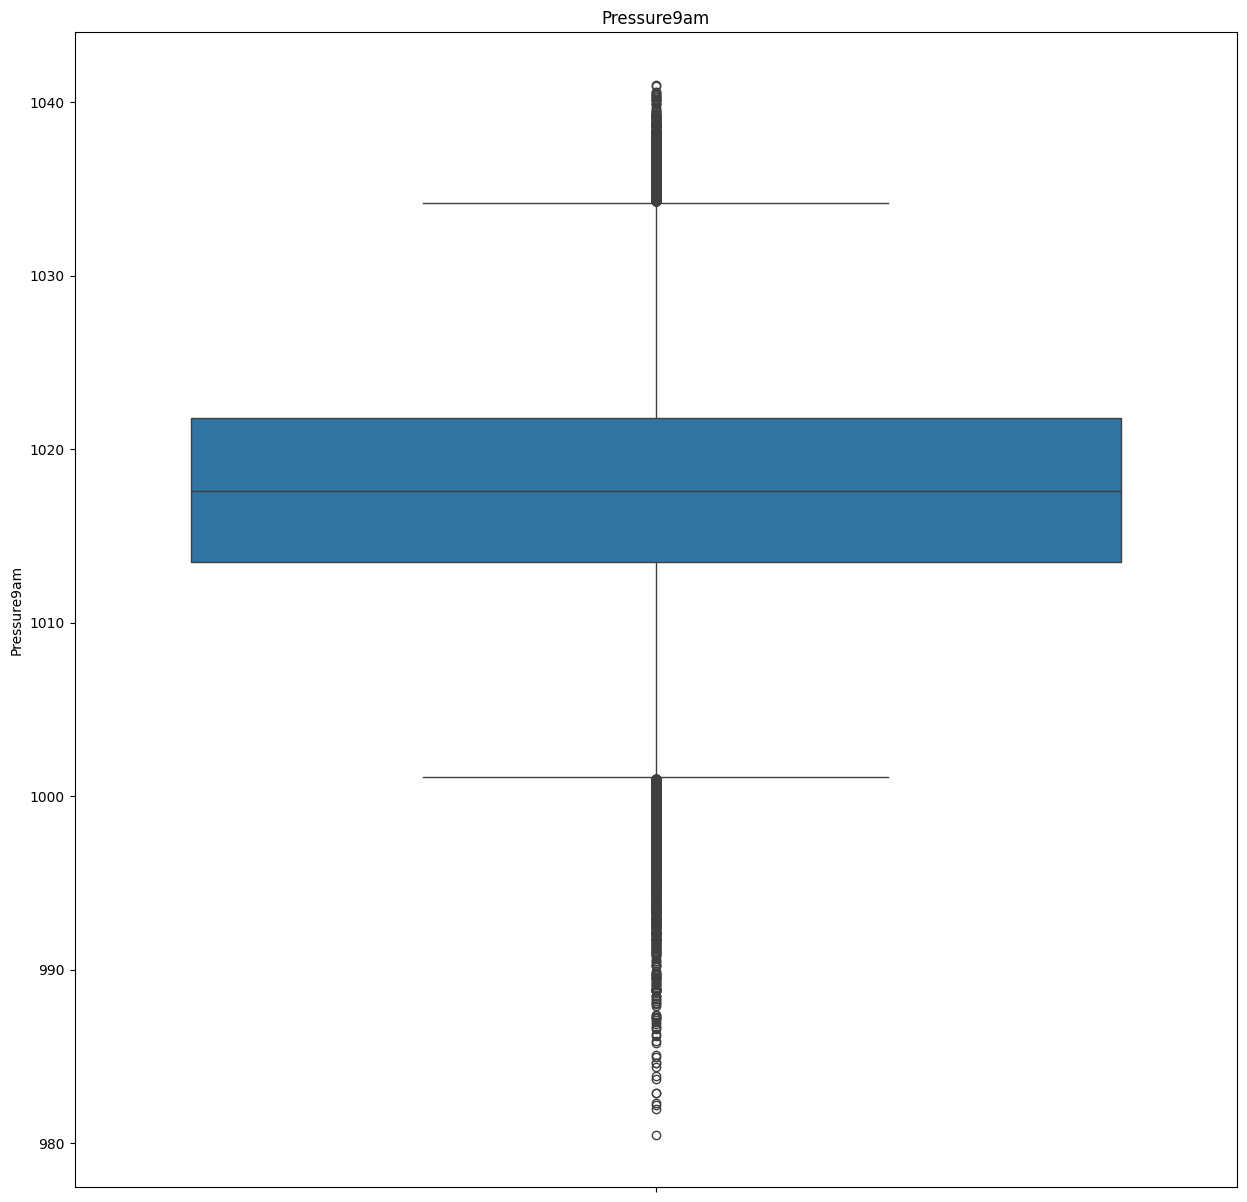

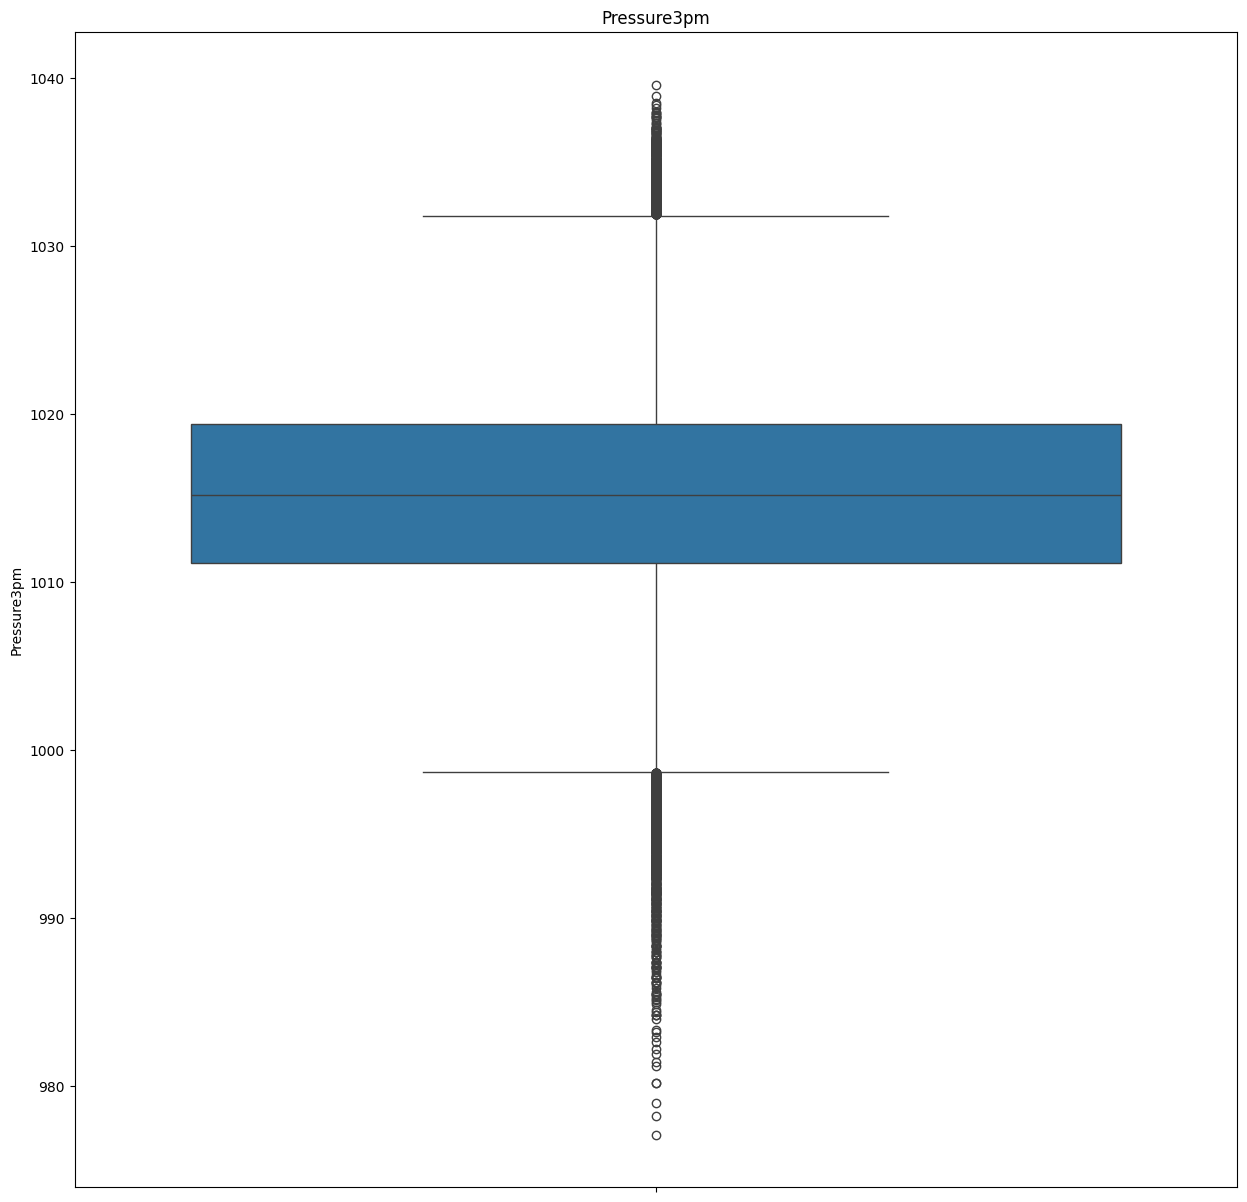

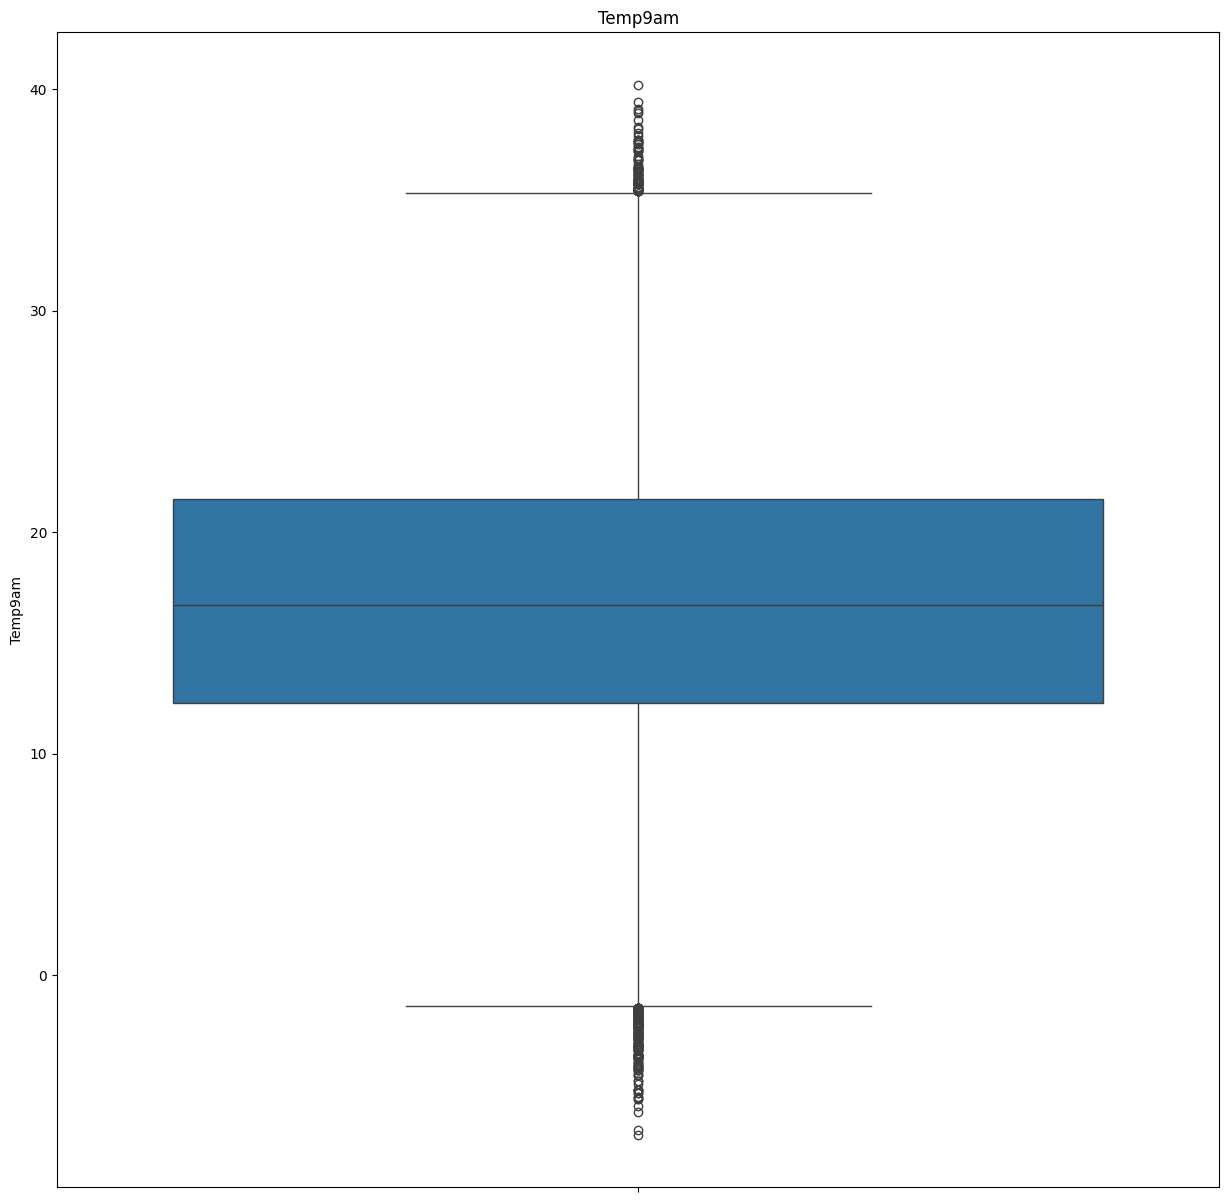

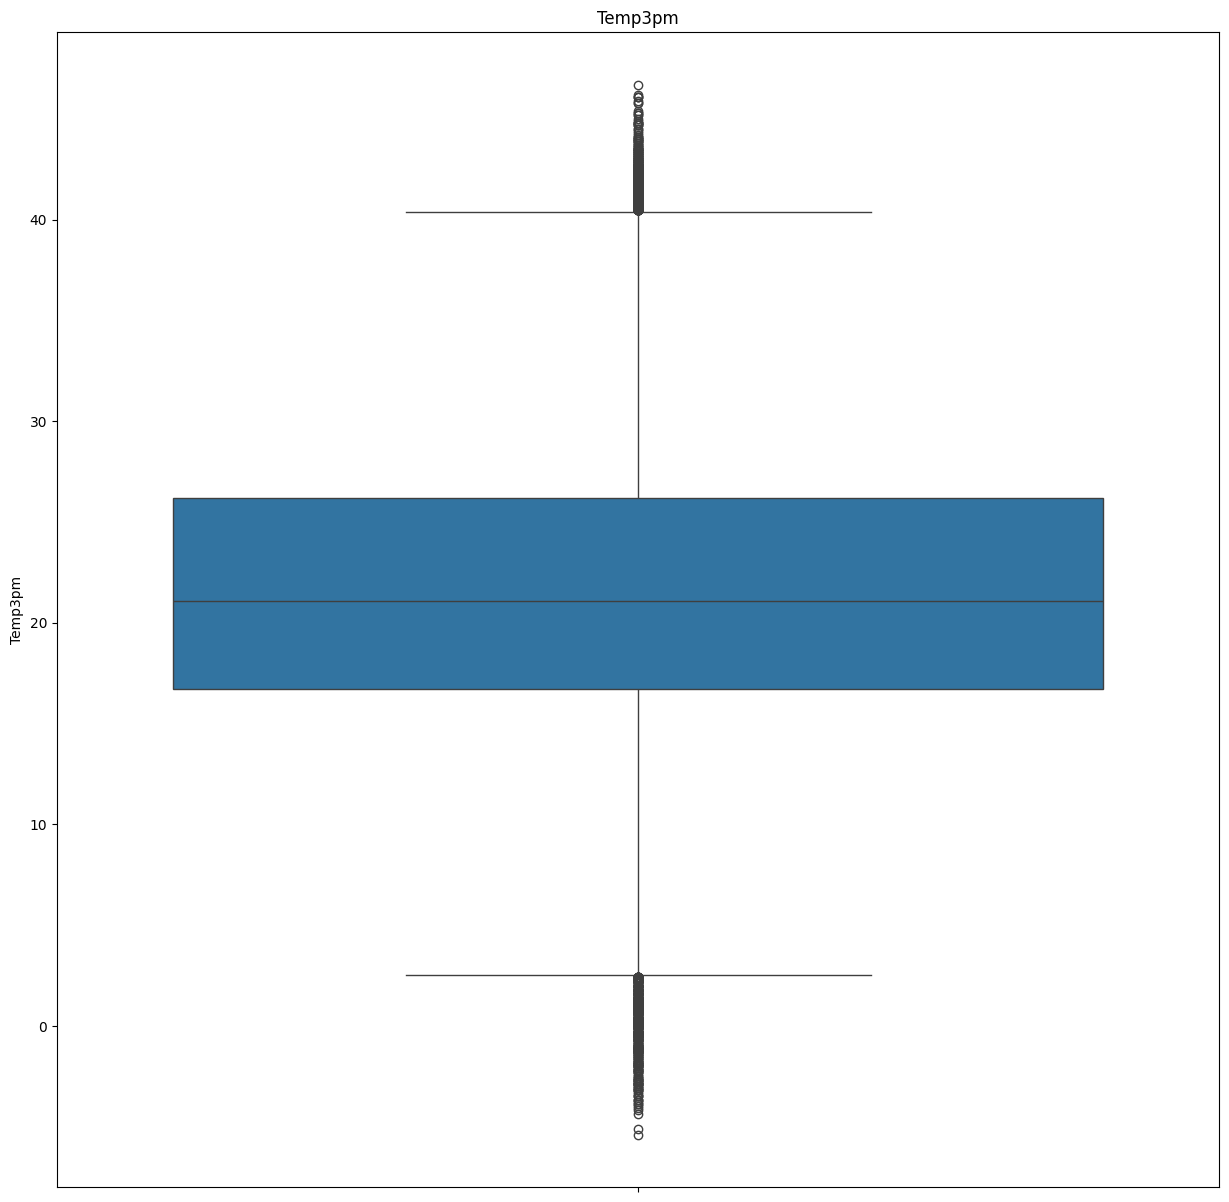

<Figure size 1500x1500 with 0 Axes>

In [29]:
# Outliers will be present in the continuous_feature
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

The approach employed in the paper to address outliers involves utilizing the interquartile range method.

In [30]:
# Let's look at the continuous features we have
continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [31]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [32]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

In [33]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.700000000000001 43.5


In [34]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

In [35]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [36]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

In [37]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.600000000000001 14.600000000000001


In [38]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

In [39]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [40]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

In [41]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [42]:

df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

In [43]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [44]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

In [45]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [46]:

df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

In [47]:

IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [48]:

df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

In [49]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.6500000000001 1031.85


In [50]:

df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

In [51]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [52]:

df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

In [53]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999993 40.45


In [54]:

df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

let's look at the new boxplot

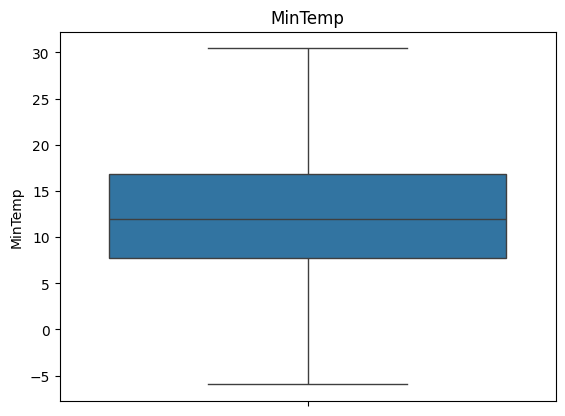

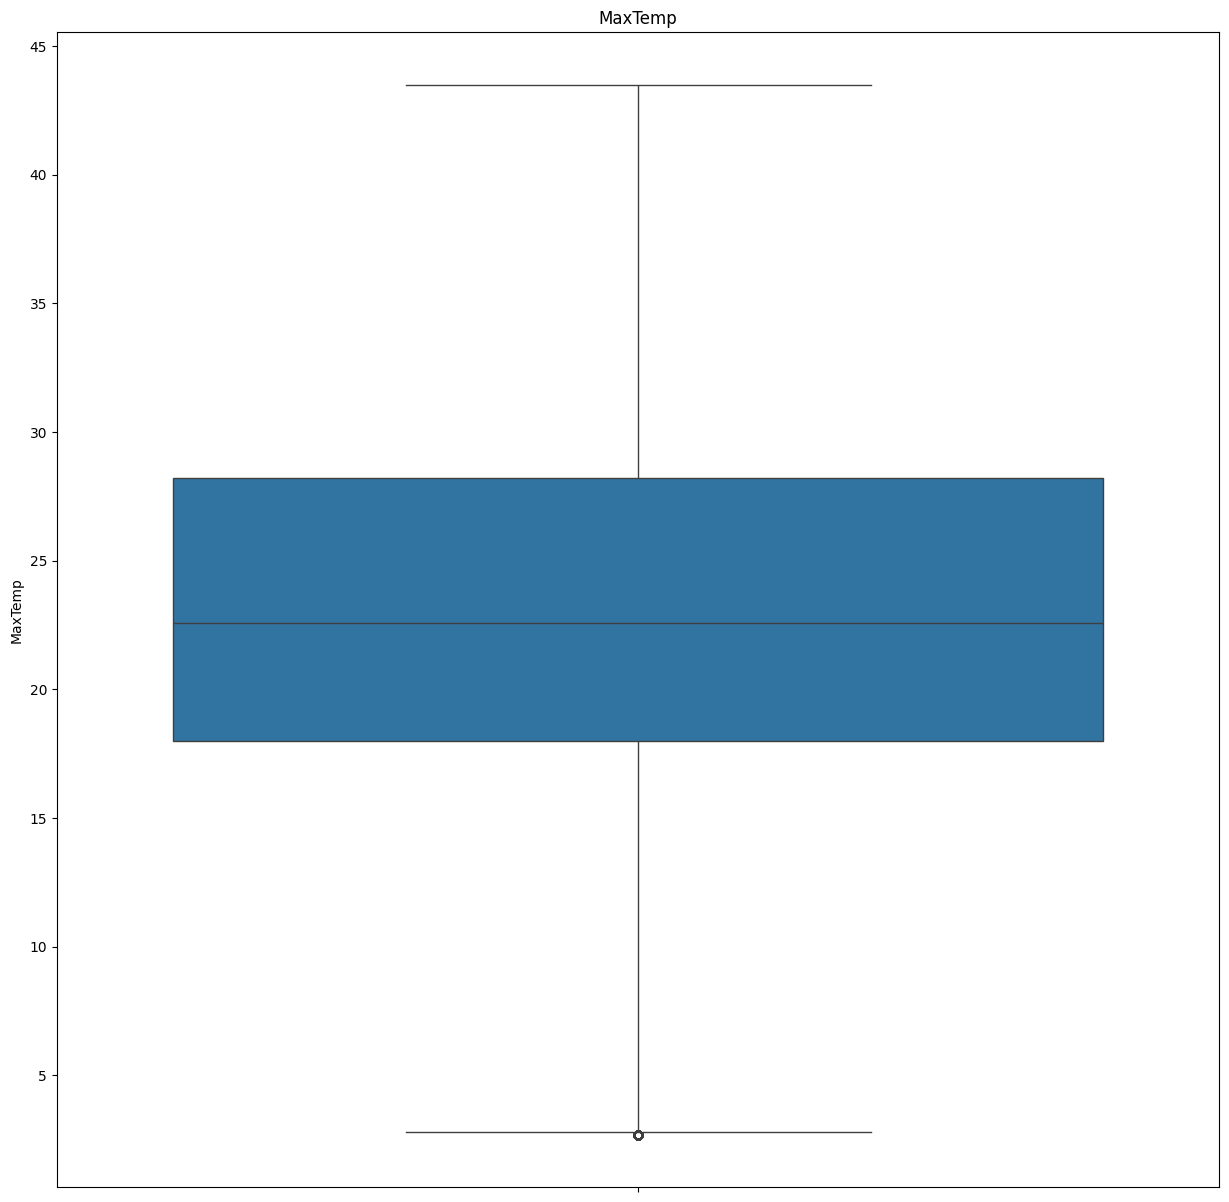

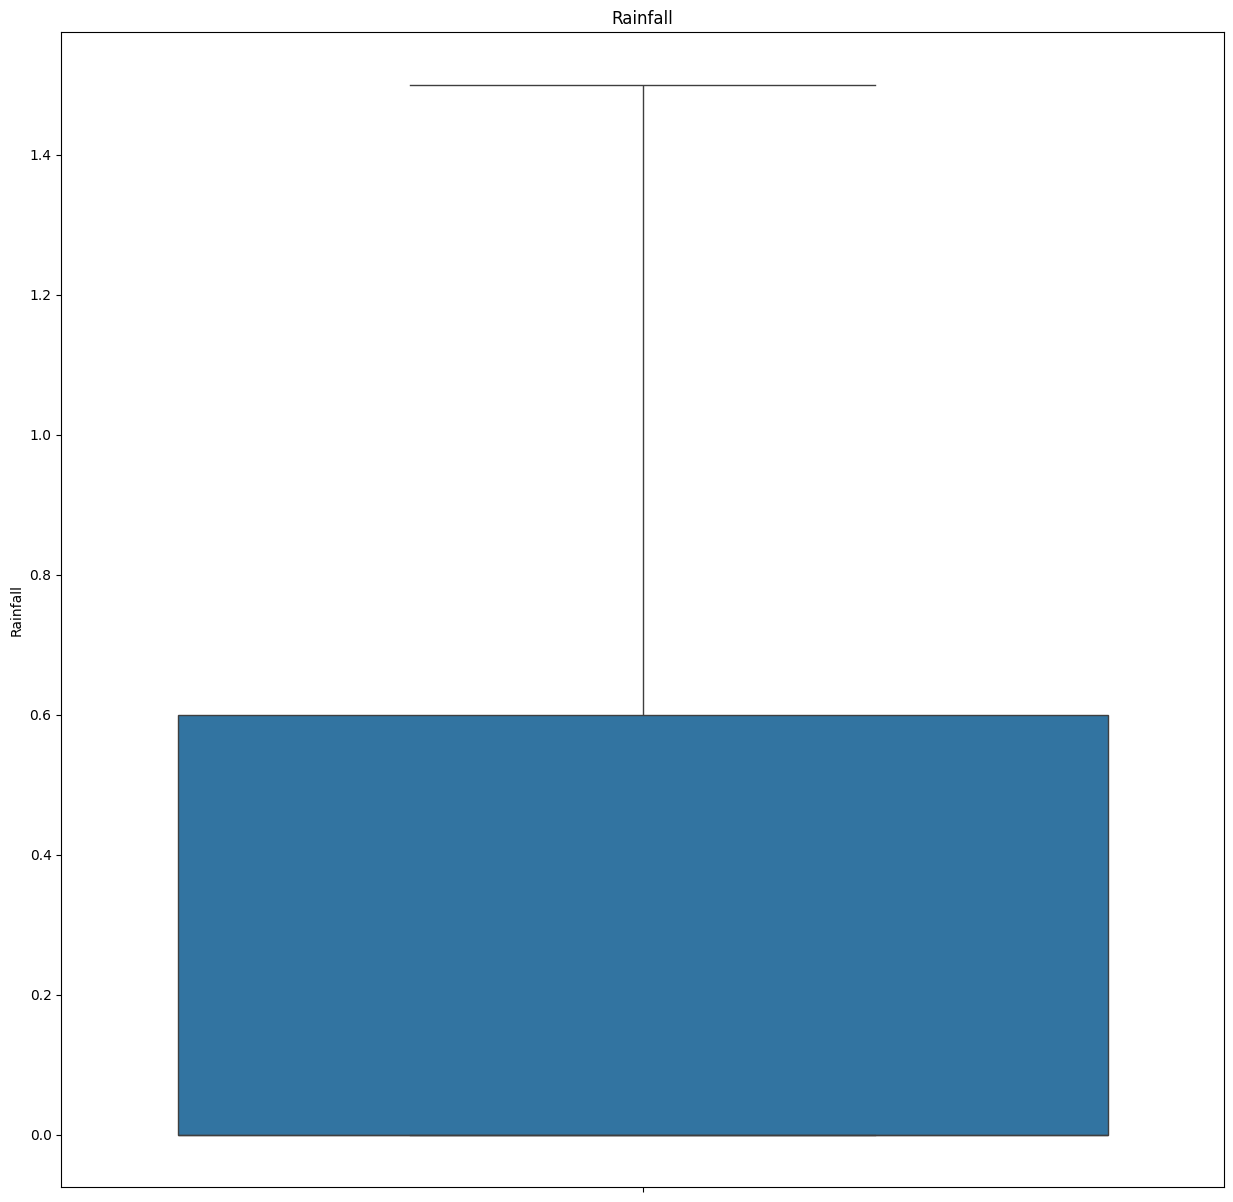

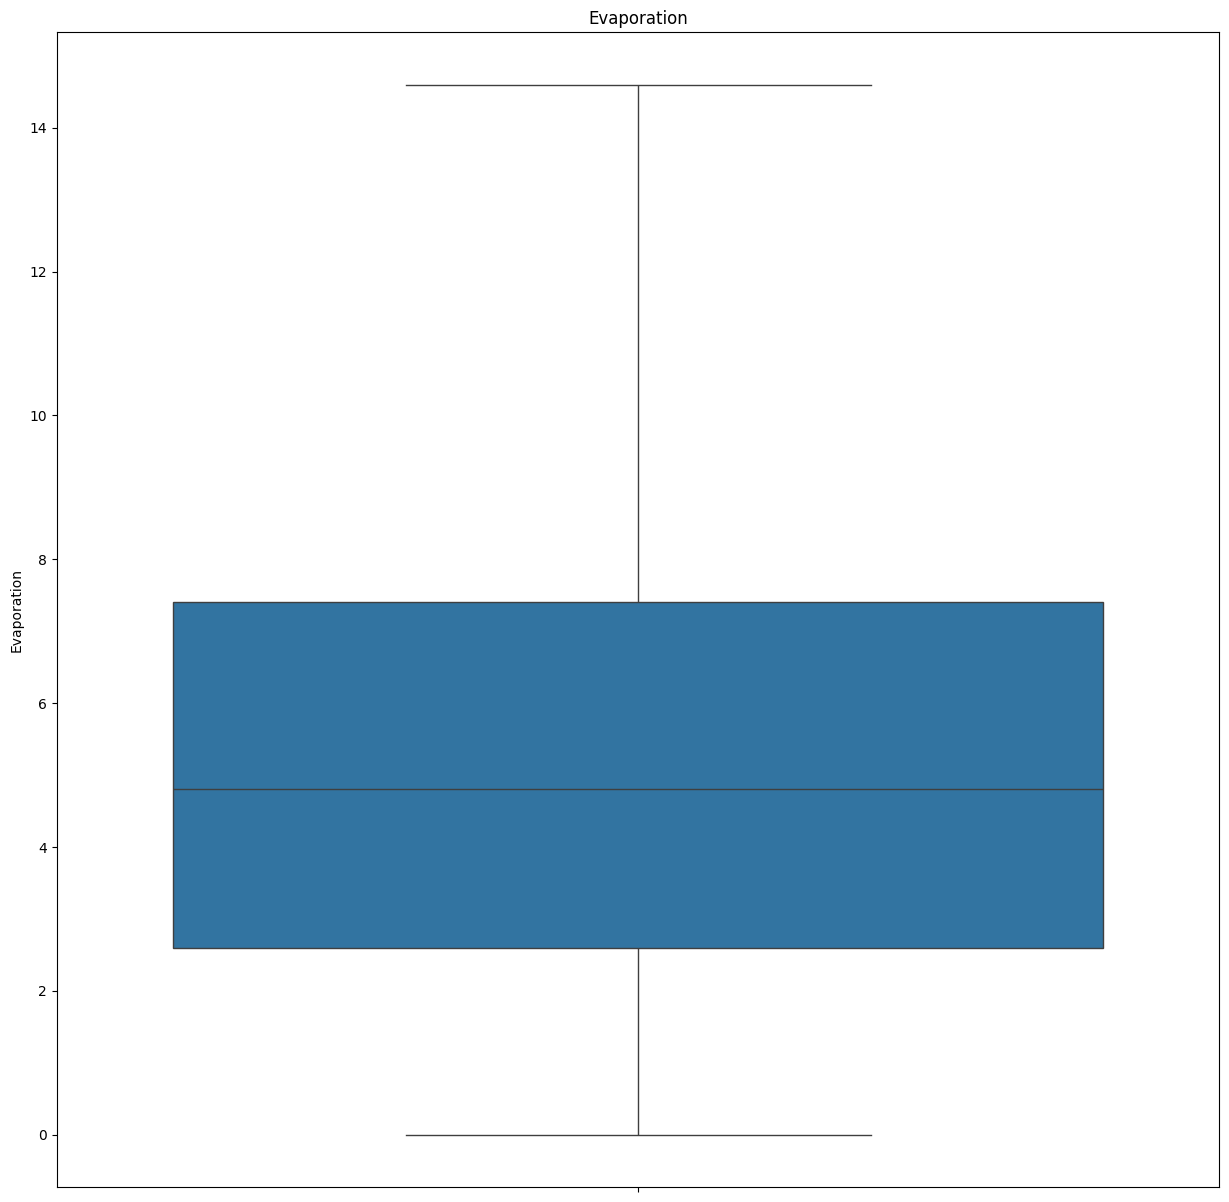

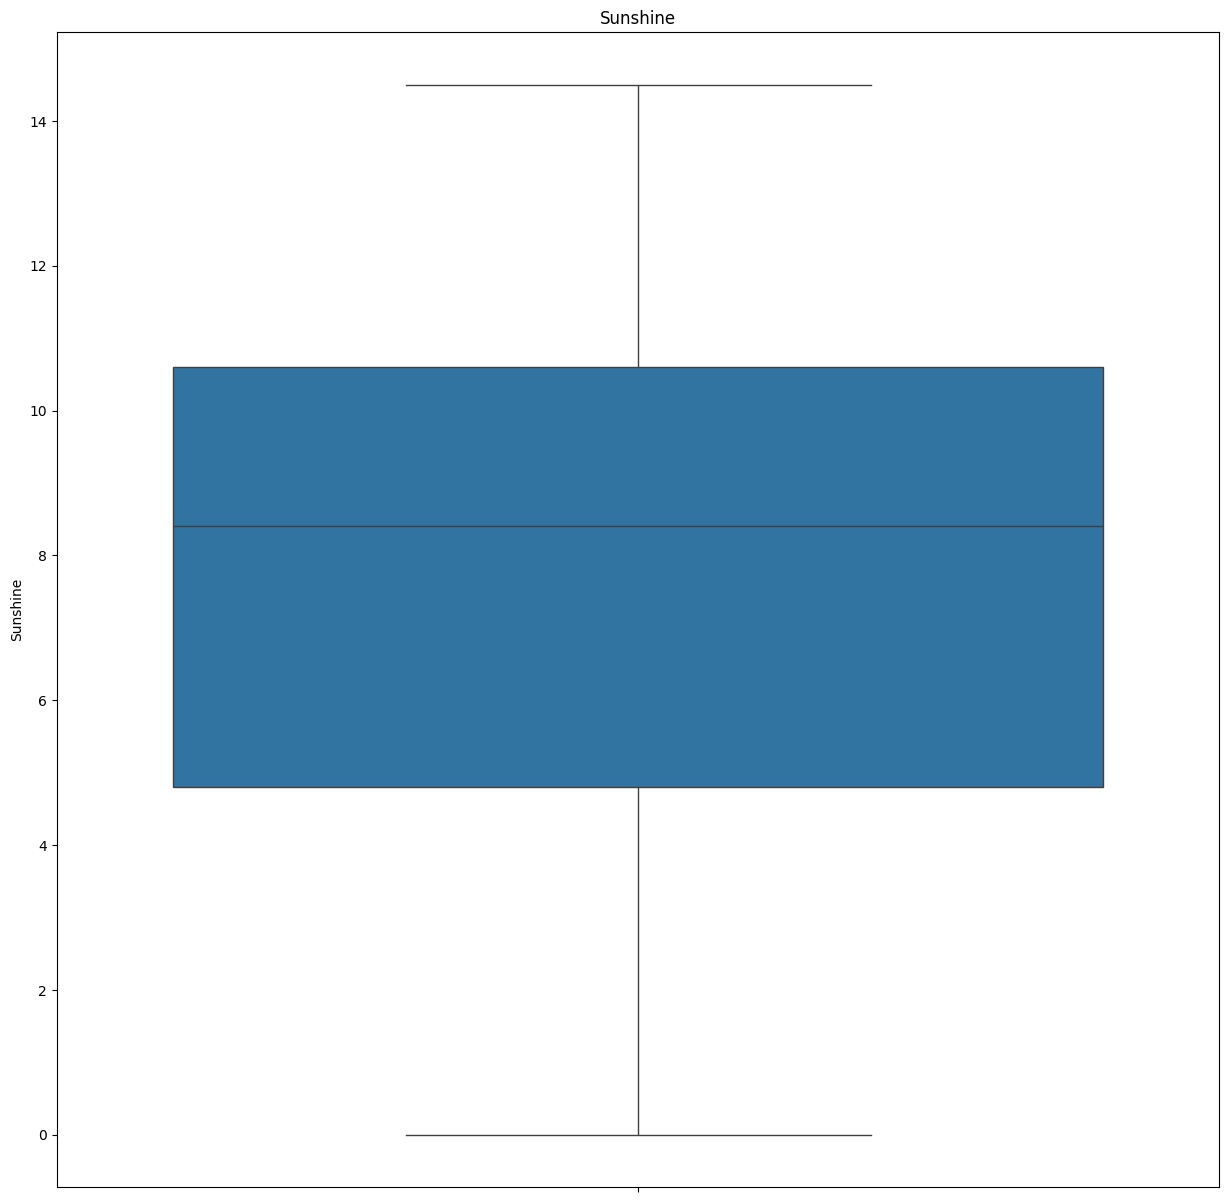

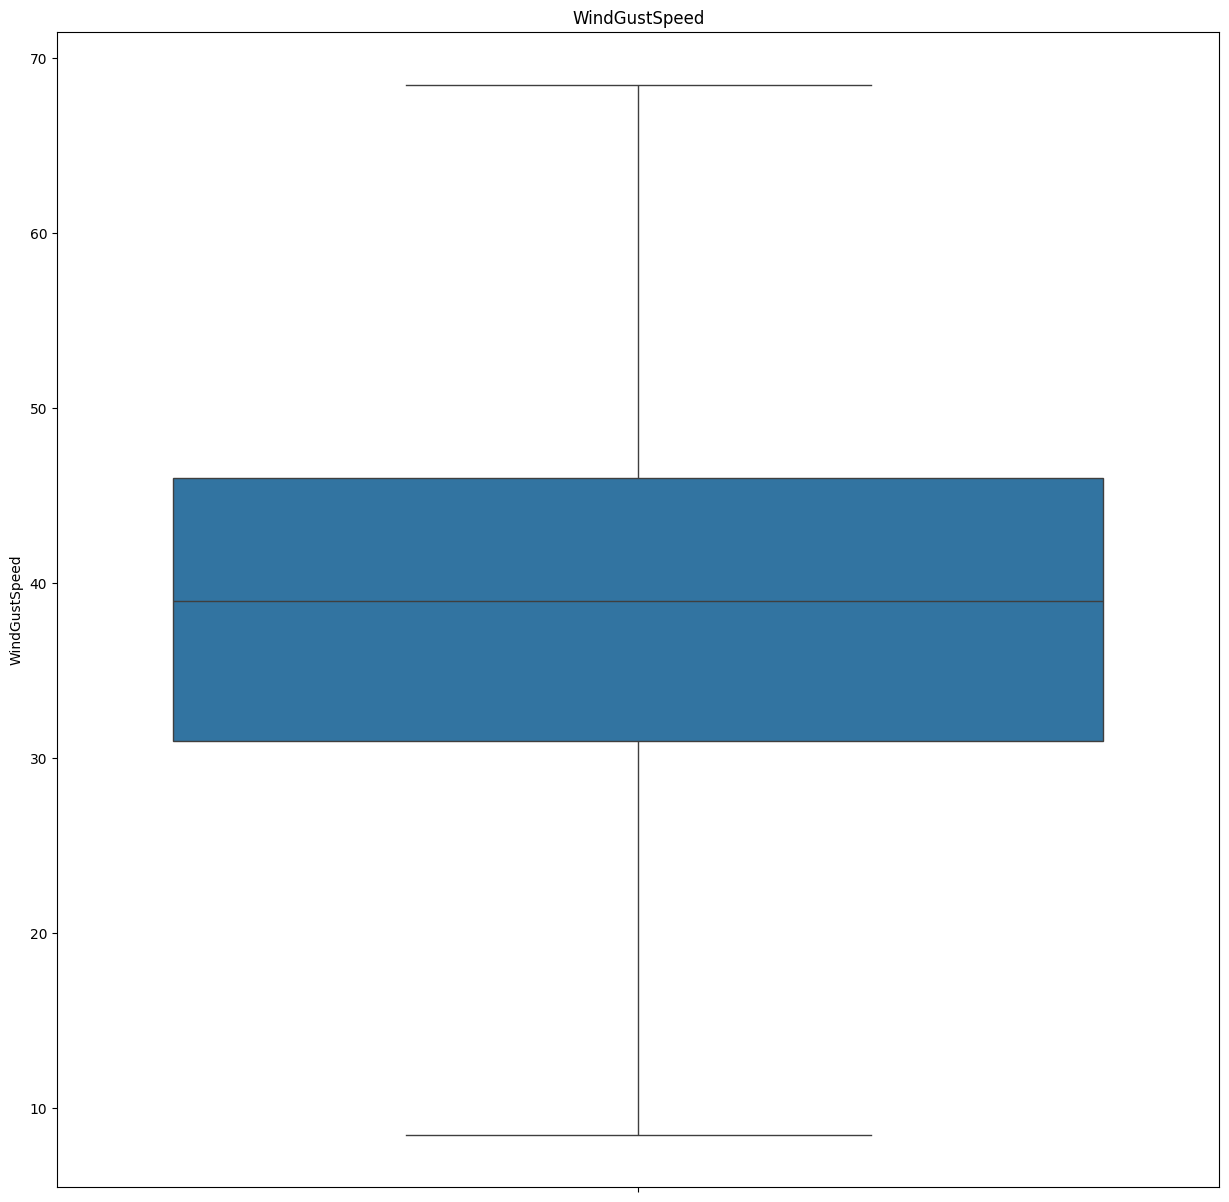

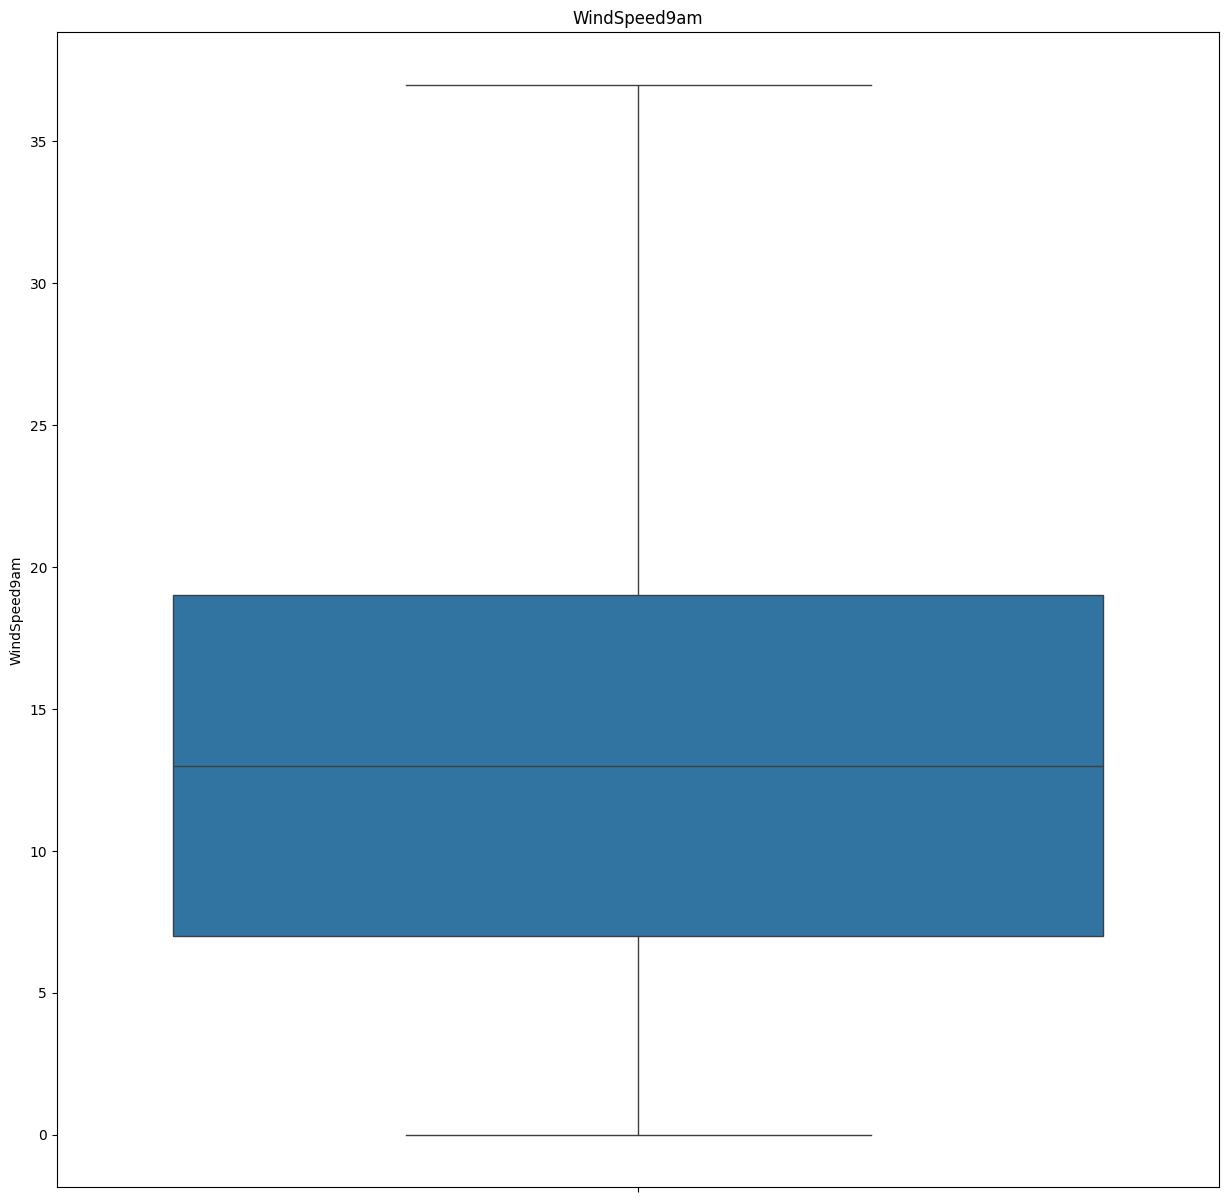

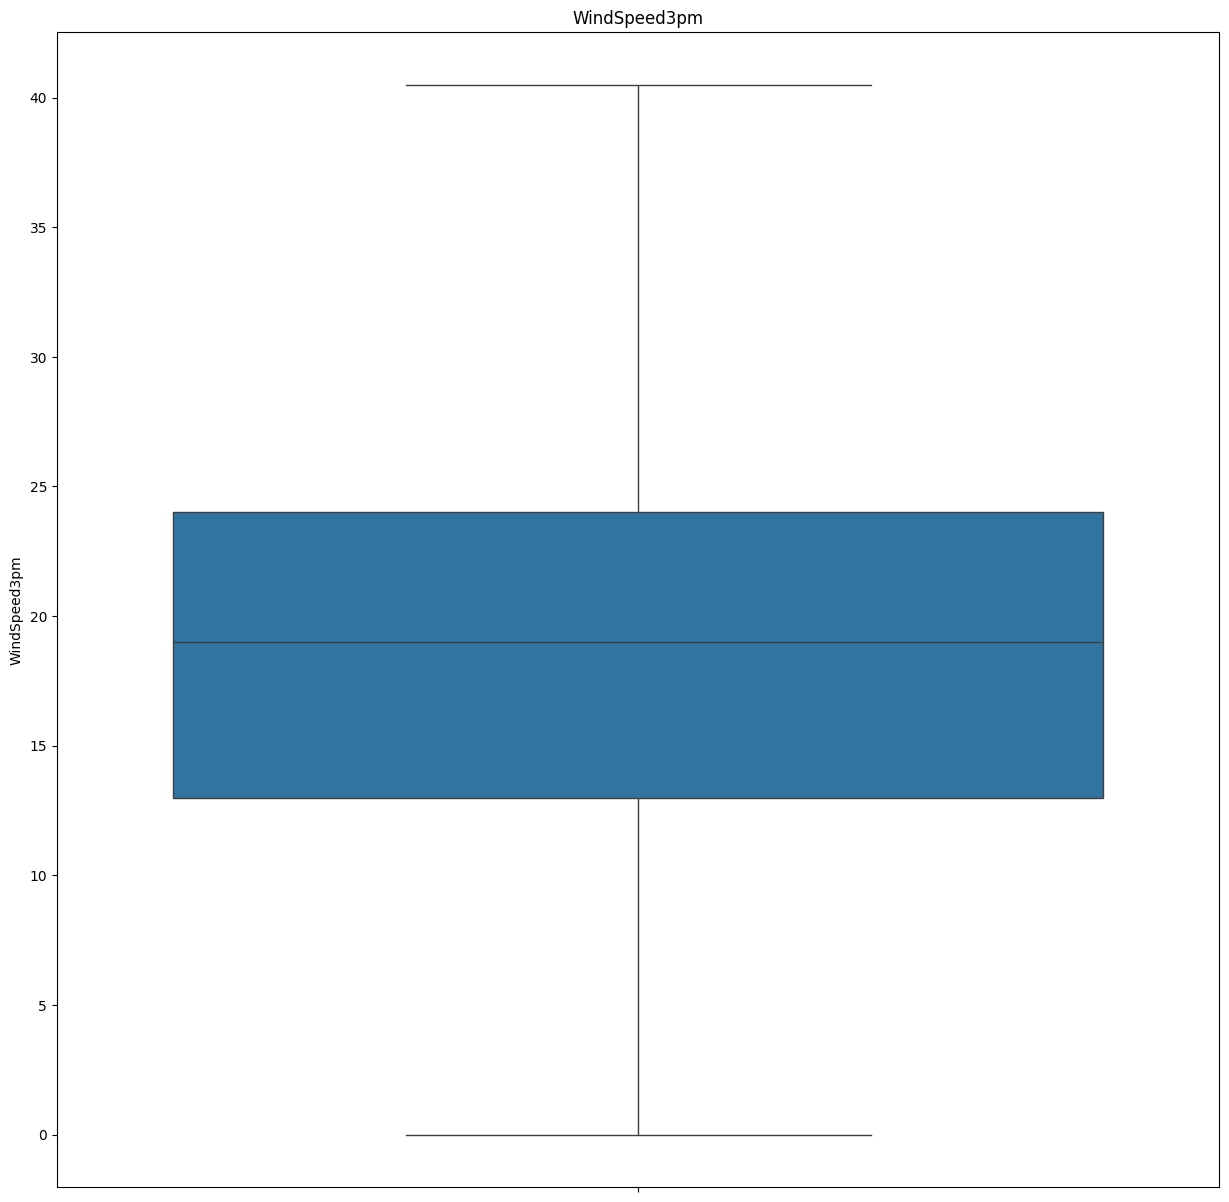

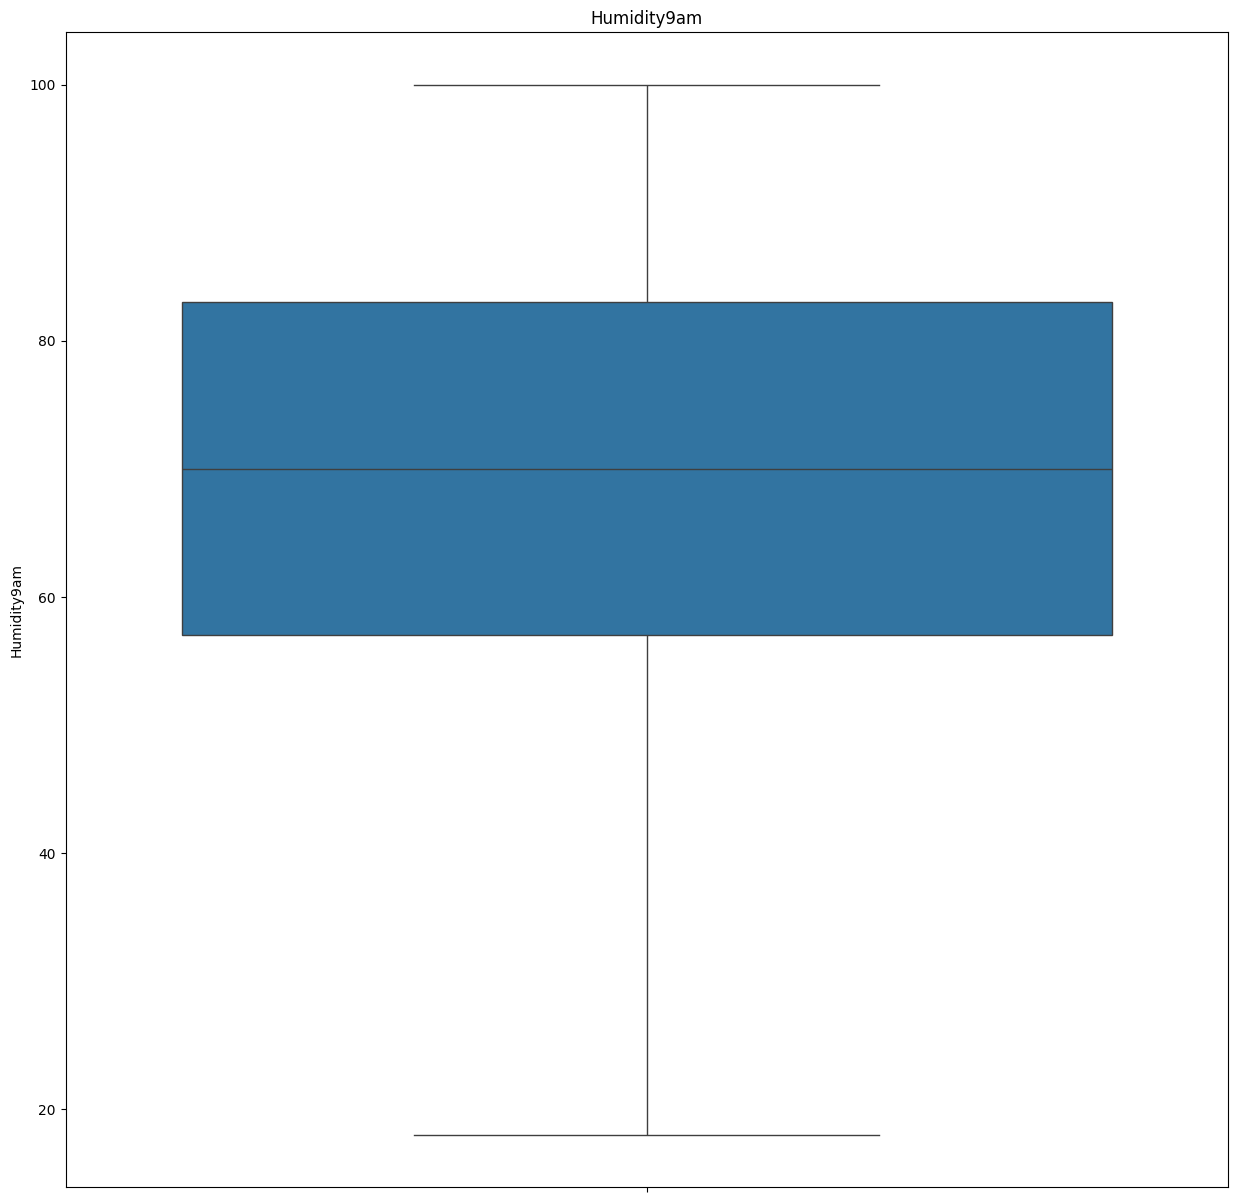

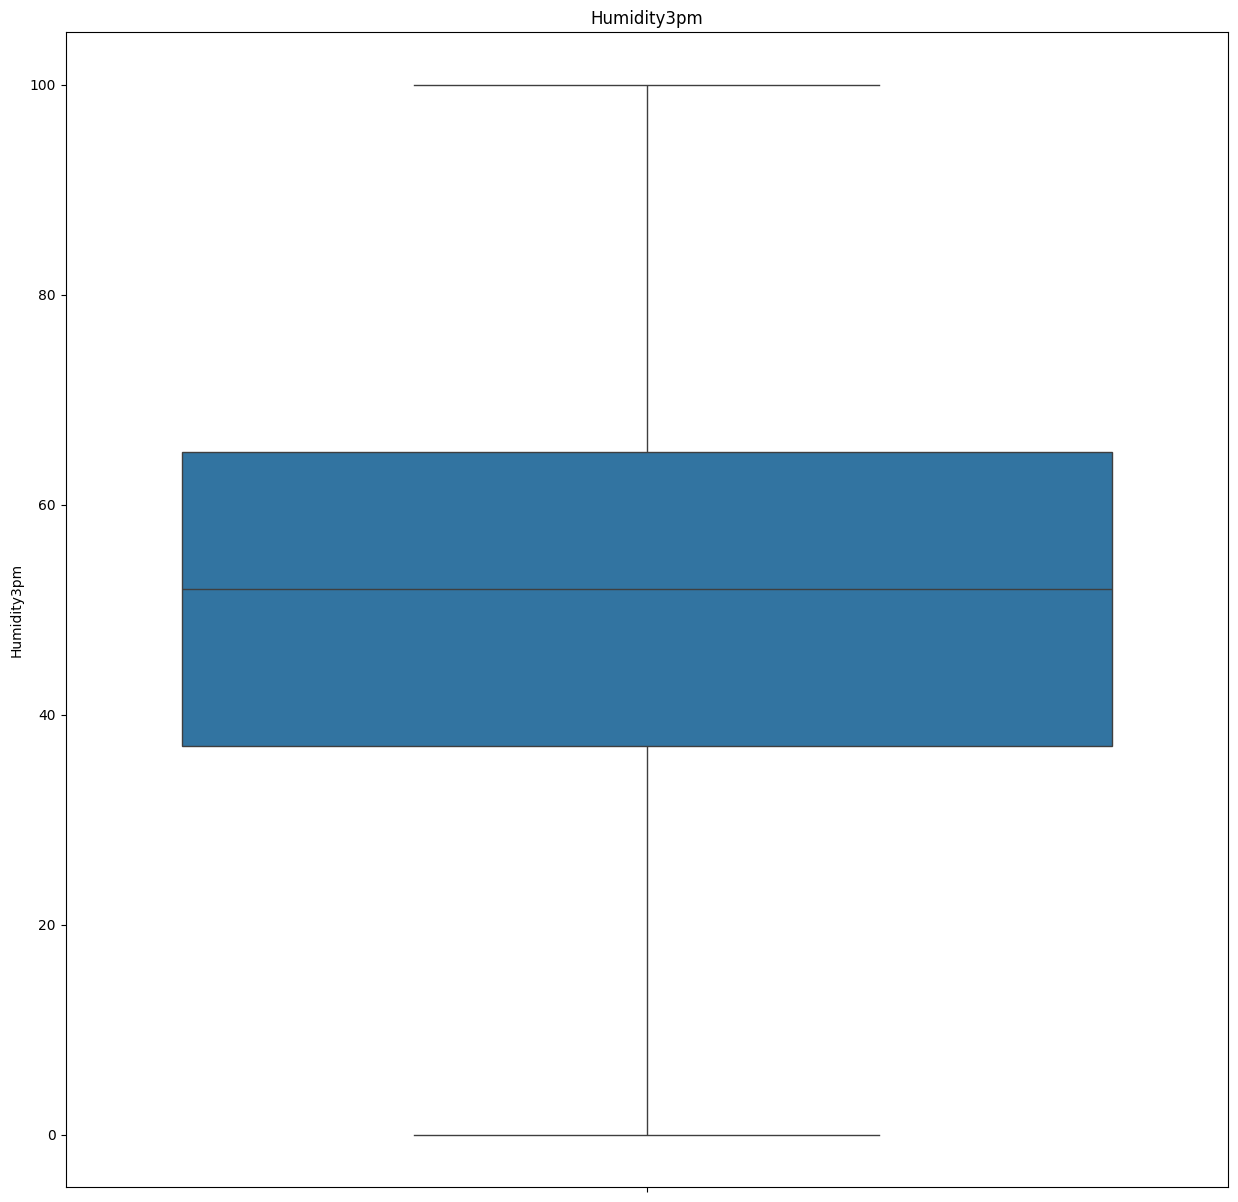

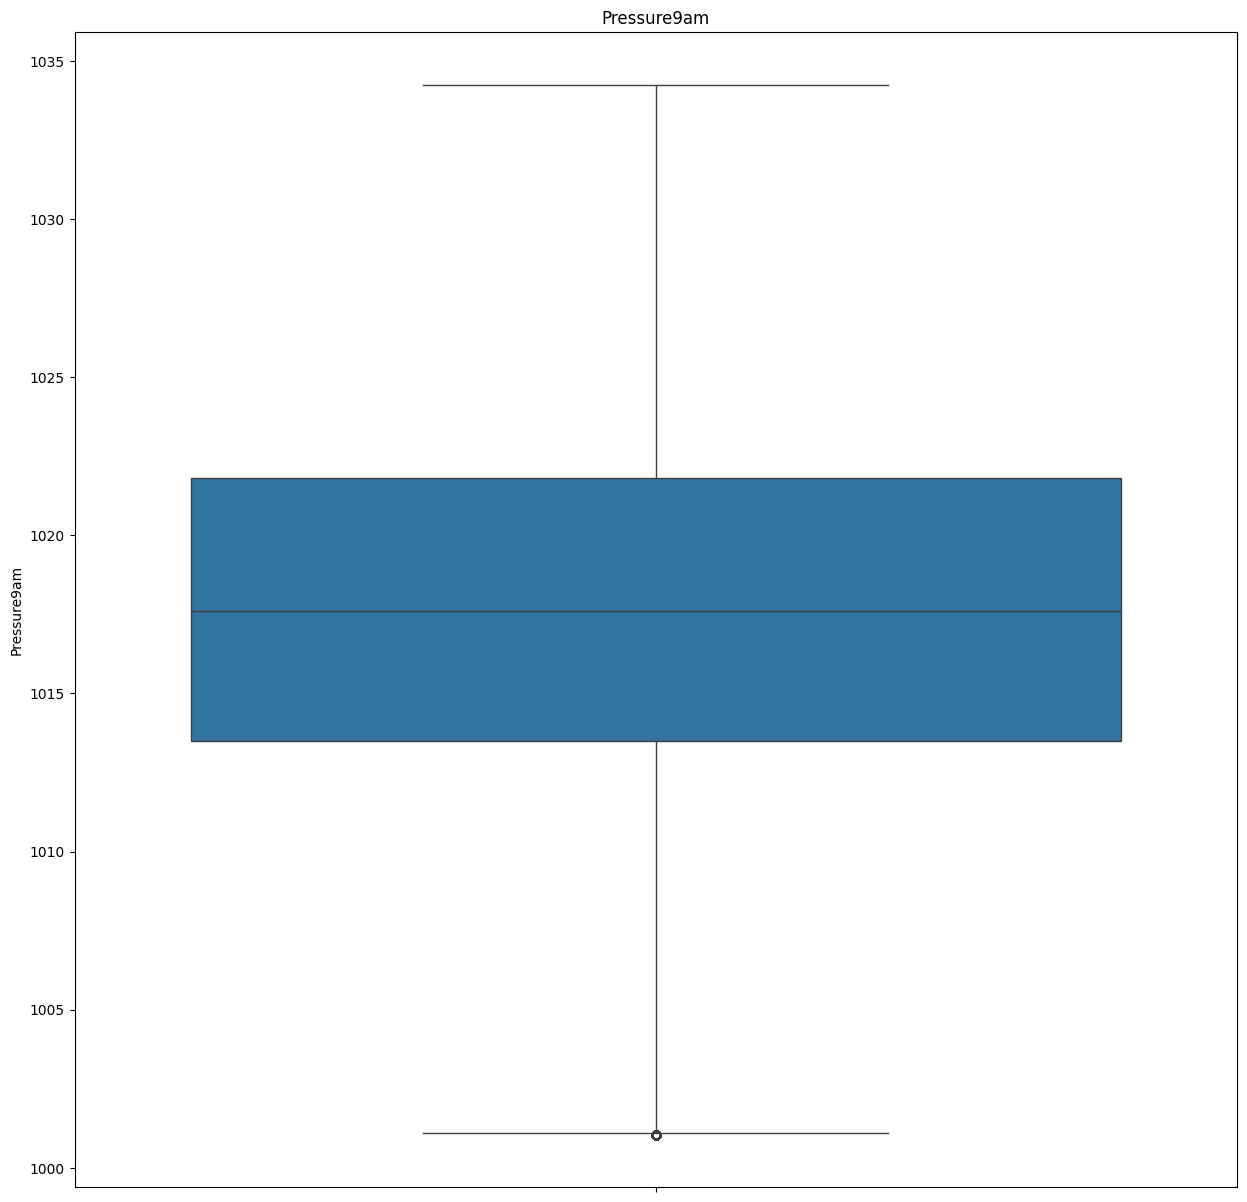

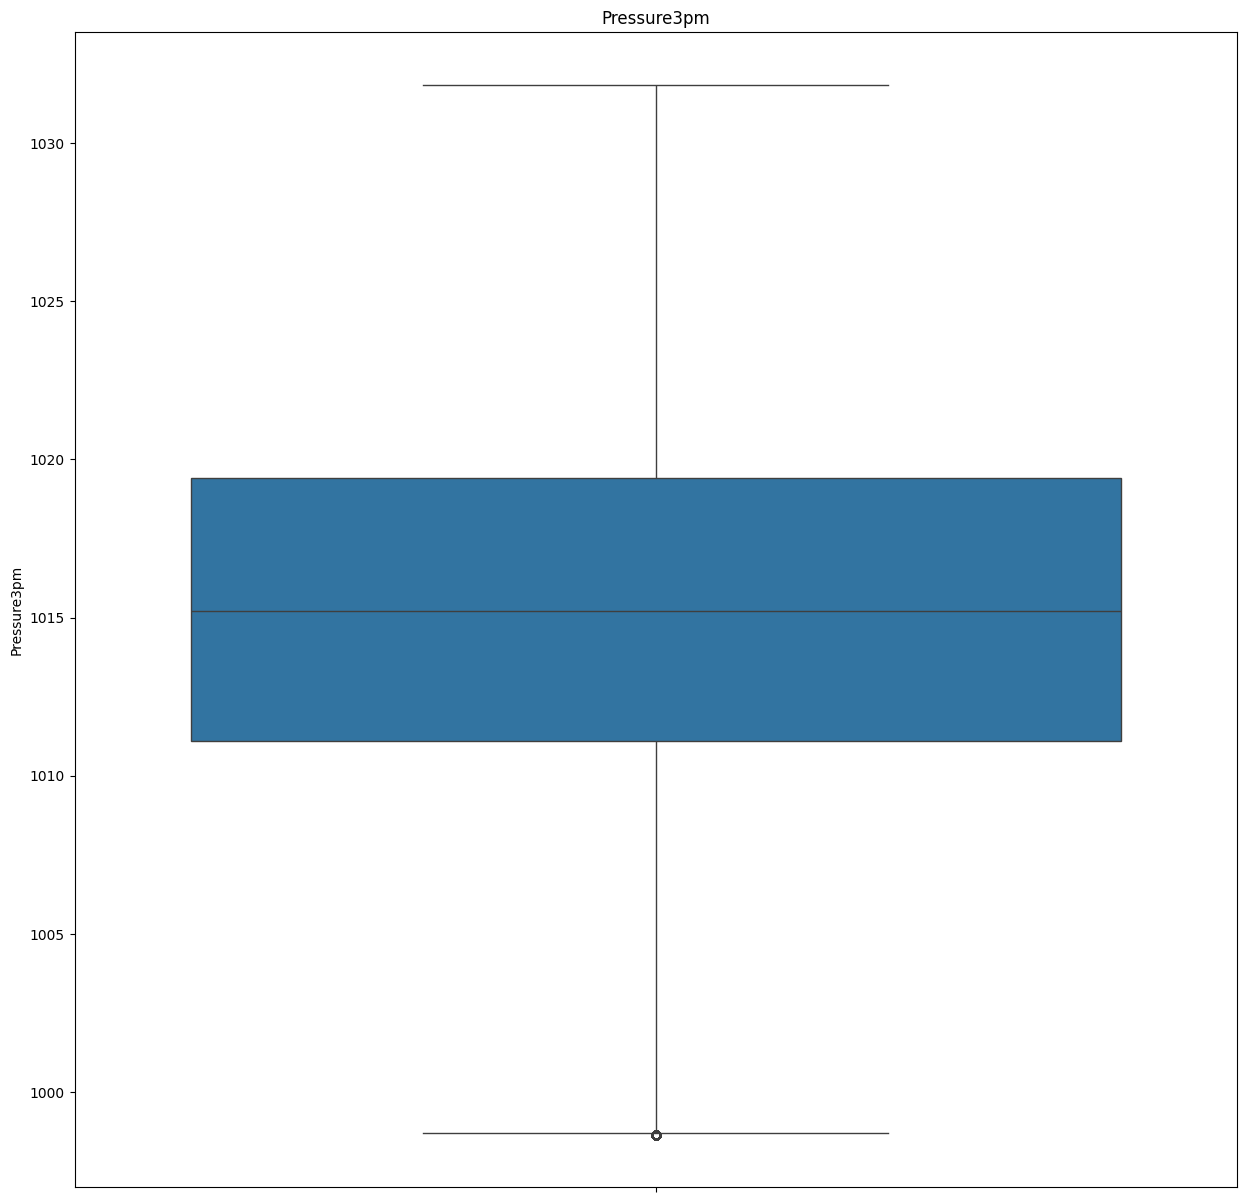

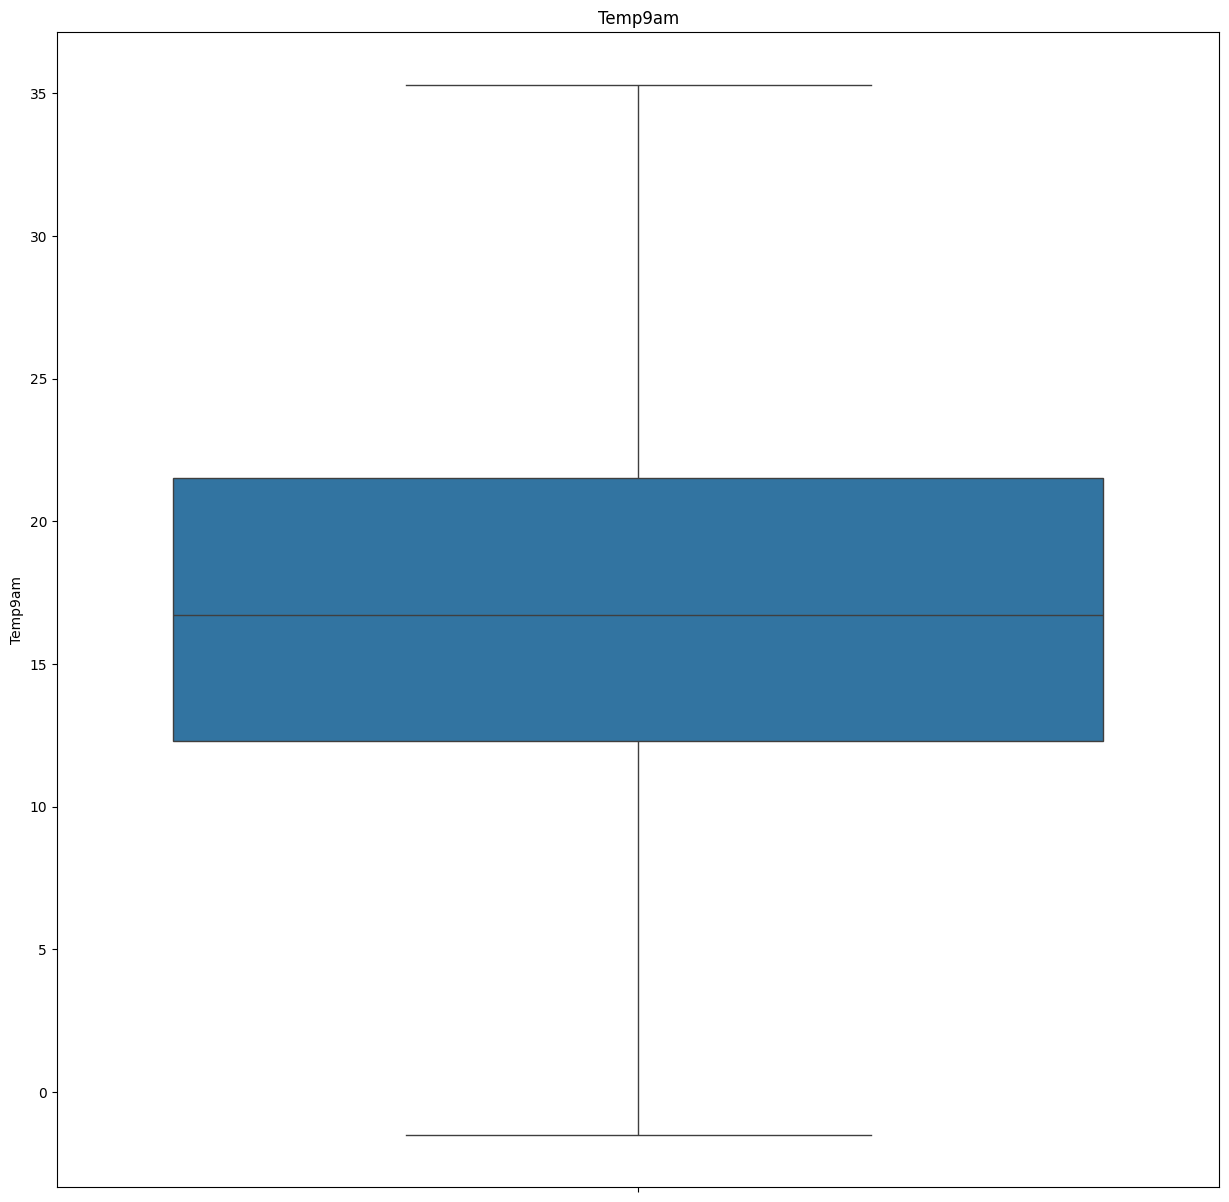

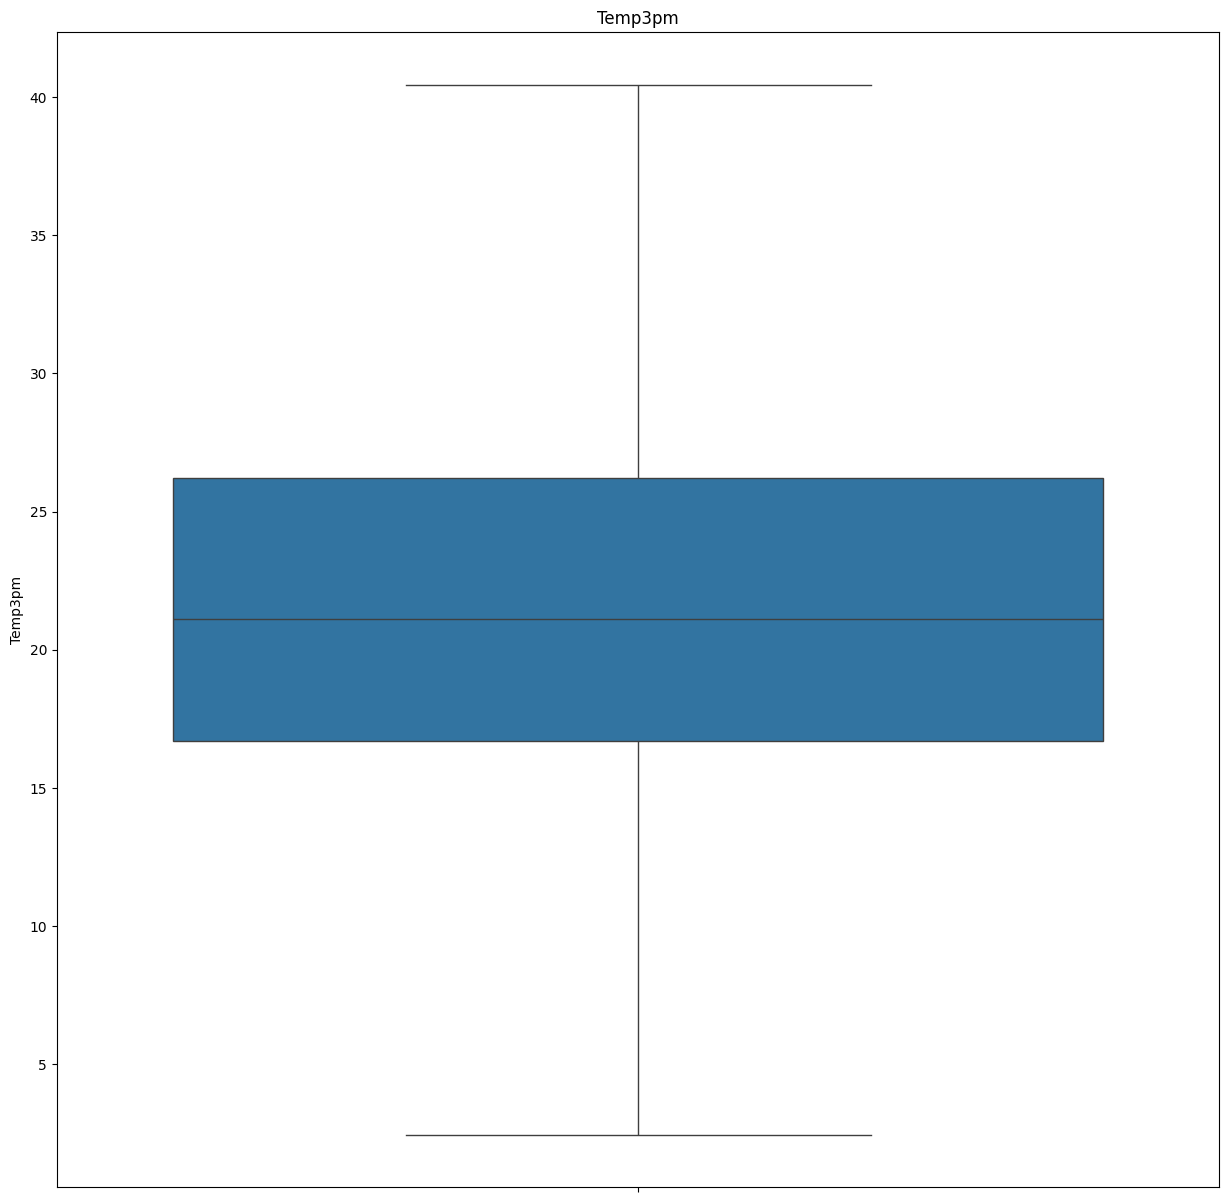

<Figure size 1500x1500 with 0 Axes>

In [55]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### Seems like we've dealt with all the outliers ###
<hr>

## Data Visualization
This section we will visualize the cleaned data, all the graphs are plotted according to the base paper.

#### An overall description of the Data ####

In [56]:
df.describe().transpose()

count         mean        std      min     25%     50%  \
Location       145460.0    24.289784  13.759051     1.00    12.0    24.0   
MinTemp        145460.0    12.192336   6.364499    -5.95     7.7    12.0   
MaxTemp        145460.0    23.219758   7.067804     2.70    18.0    22.6   
Rainfall       145460.0     0.381674   0.608638     0.00     0.0     0.0   
Evaporation    145460.0     5.313828   3.415778     0.00     2.6     4.8   
Sunshine       145460.0     7.609641   3.785983     0.00     4.8     8.4   
WindGustDir    145460.0     7.311804   4.472865     0.00     4.0     7.0   
WindGustSpeed  145460.0    39.643280  12.175910     8.50    31.0    39.0   
WindDir9am     145460.0     6.964423   4.837706     0.00     2.0     7.0   
WindDir3pm     145460.0     7.604297   4.492407     0.00     4.0     8.0   
WindSpeed9am   145460.0    13.939757   8.555976     0.00     7.0    13.0   
WindSpeed3pm   145460.0    18.583126   8.442404     0.00    13.0    19.0   
Humidity9am    145460.0    68.953025  18.704151    18.00    57.0    70.0   
Humidity3pm    145460.0    51.553396  20.471345     0.00    37.0    52.0   
Pressure9am    145460.0  1017.671706   6.568469  1001.05  1013.5  1017.6   
Pressure3pm    145460.0  1015.268537   6.528909   998.65  1011.1  1015.2   
Cloud9am       145460.0     4.446556   2.887669     0.00     1.0     5.0   
Cloud3pm       145460.0     4.508112   2.719517     0.00     2.0     5.0   
Temp9am        145460.0    16.988221   6.440843    -1.49    12.3    16.7   
Temp3pm        145460.0    21.671194   6.813343     2.45    16.7    21.1   
Date_month     145460.0     6.399615   3.427262     1.00     3.0     6.0   

                  75%      max  
Location         36.0    49.00  
MinTemp          16.8    30.45  
MaxTemp          28.2    43.50  
Rainfall          0.6     1.50  
Evaporation       7.4    14.60  
Sunshine         10.6    14.50  
WindGustDir      11.0    15.00  
WindGustSpeed    46.0    68.50  
WindDir9am       11.0    15.00  
WindDir3pm       11.0    15.00  
WindSpeed9am     19.0    37.00  
WindSpeed3pm     24.0    40.50  
Humidity9am      83.0   100.00  
Humidity3pm      65.0   100.00  
Pressure9am    1021.8  1034.25  
Pressure3pm    1019.4  1031.85  
Cloud9am          7.0     9.00  
Cloud3pm          7.0     9.00  
Temp9am          21.5    35.30  
Temp3pm          26.2    40.45  
Date_month        9.0    12.00

#### Probability and Histogram Plot ####
Histogram is used to display the frequency or count of values within different bins or intervals.<br>
probability plot compares the quantiles of the observed data with the quantiles of a theoretical distribution.

In [57]:
import scipy.stats as stats

MinTemp


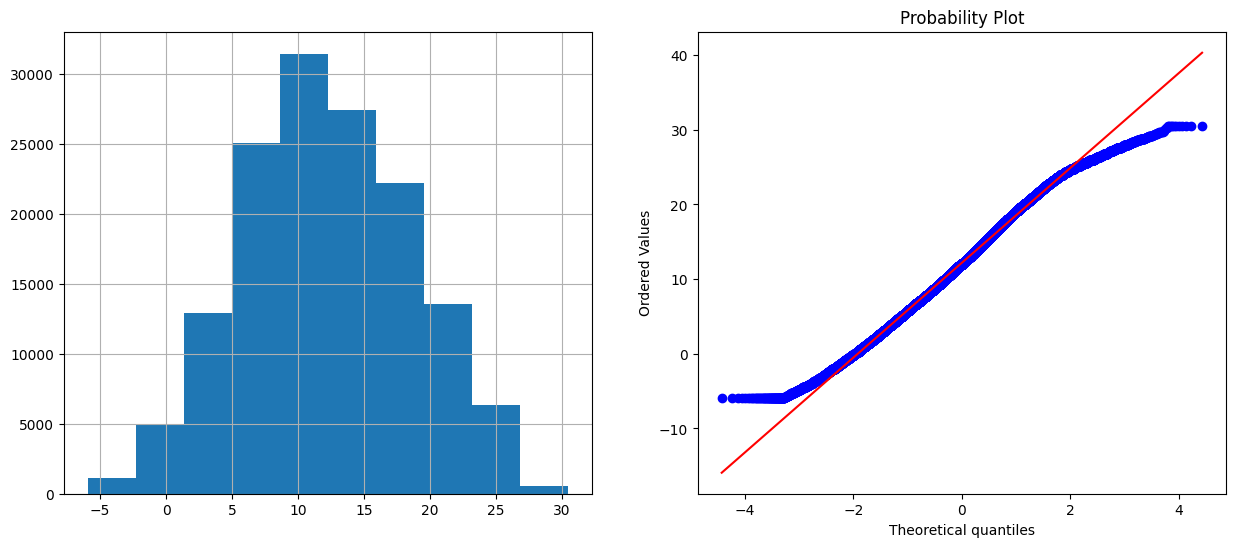

MaxTemp


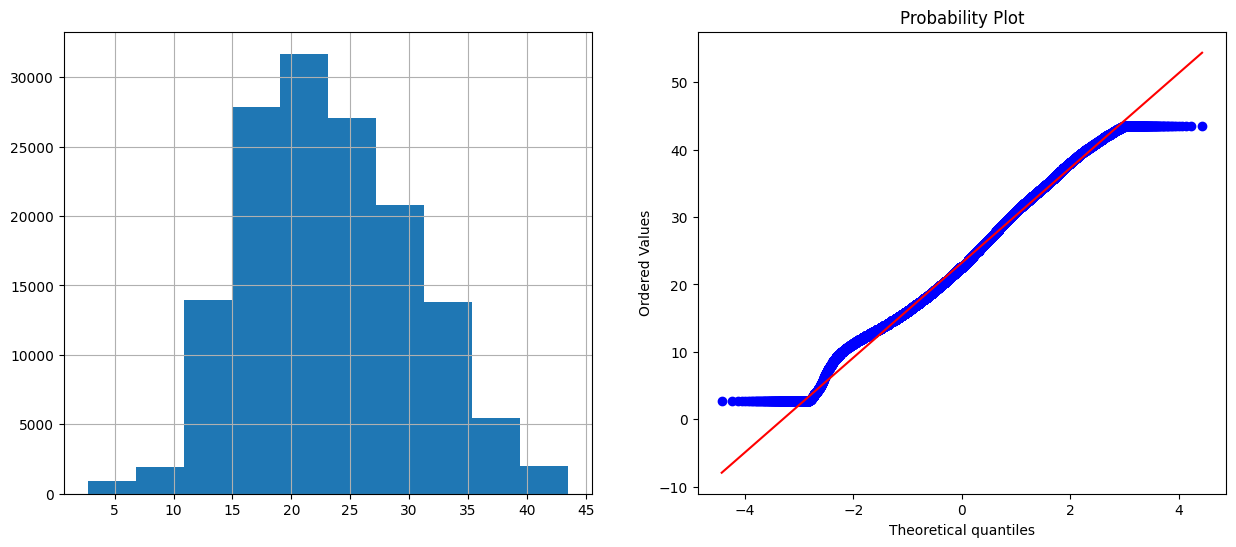

Rainfall


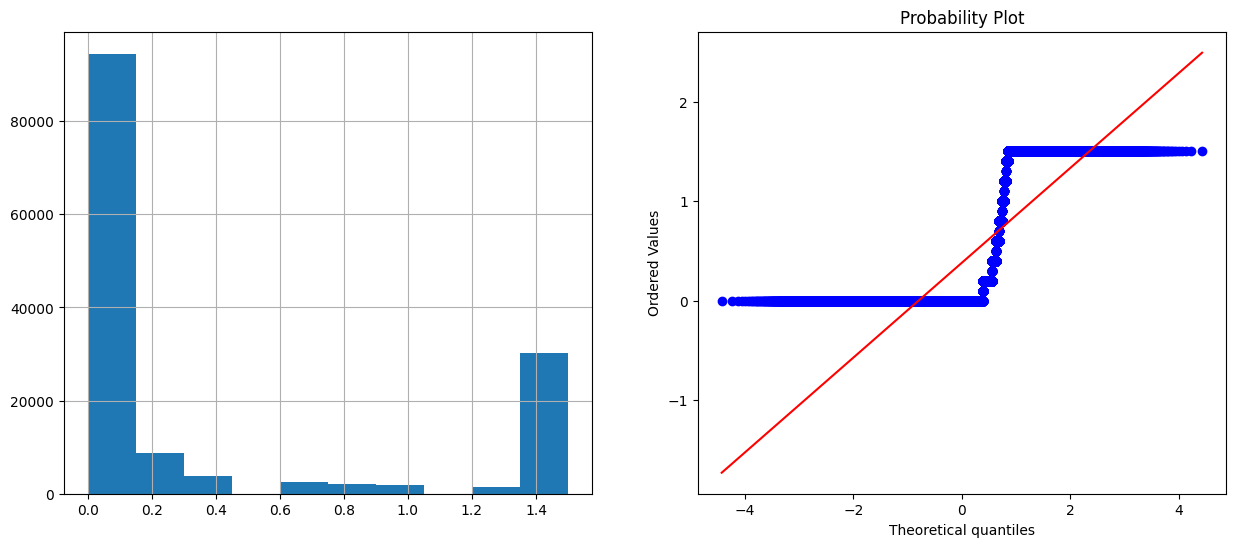

Evaporation


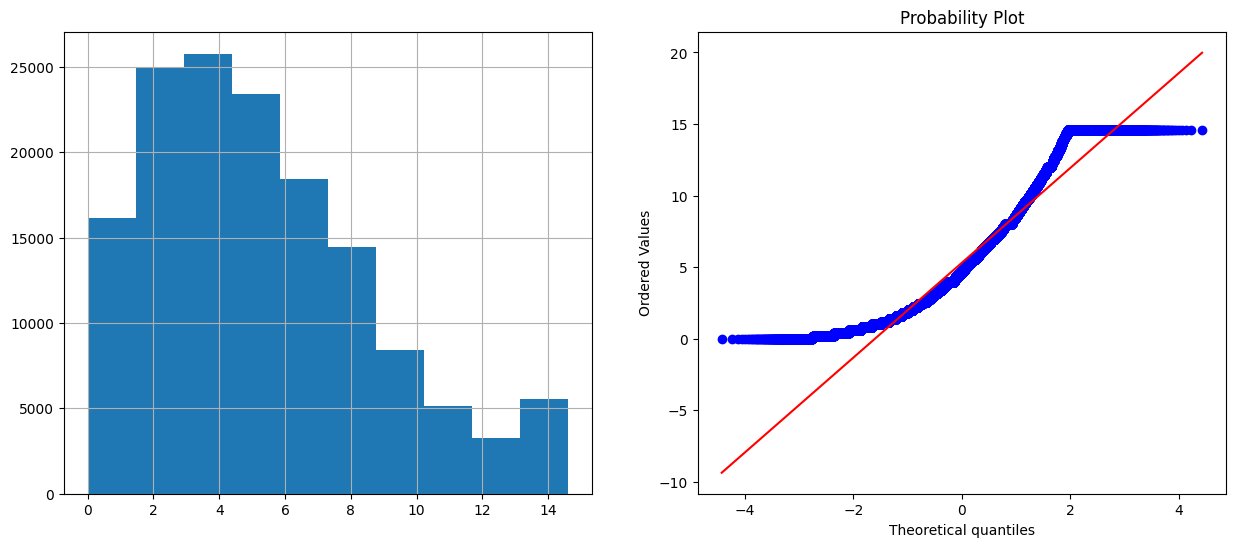

Sunshine


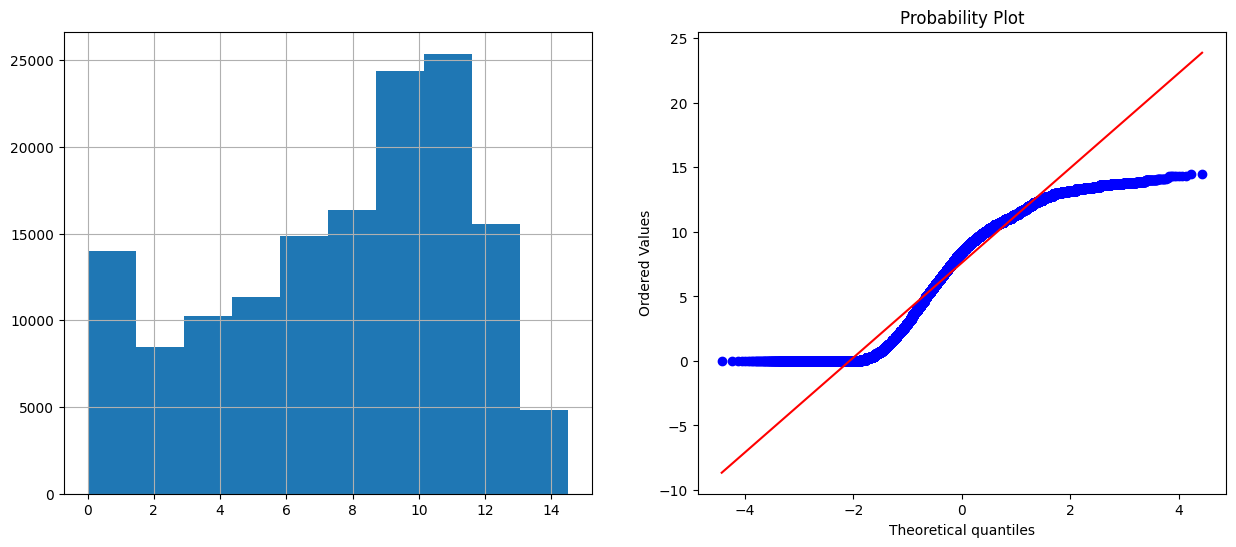

WindGustSpeed


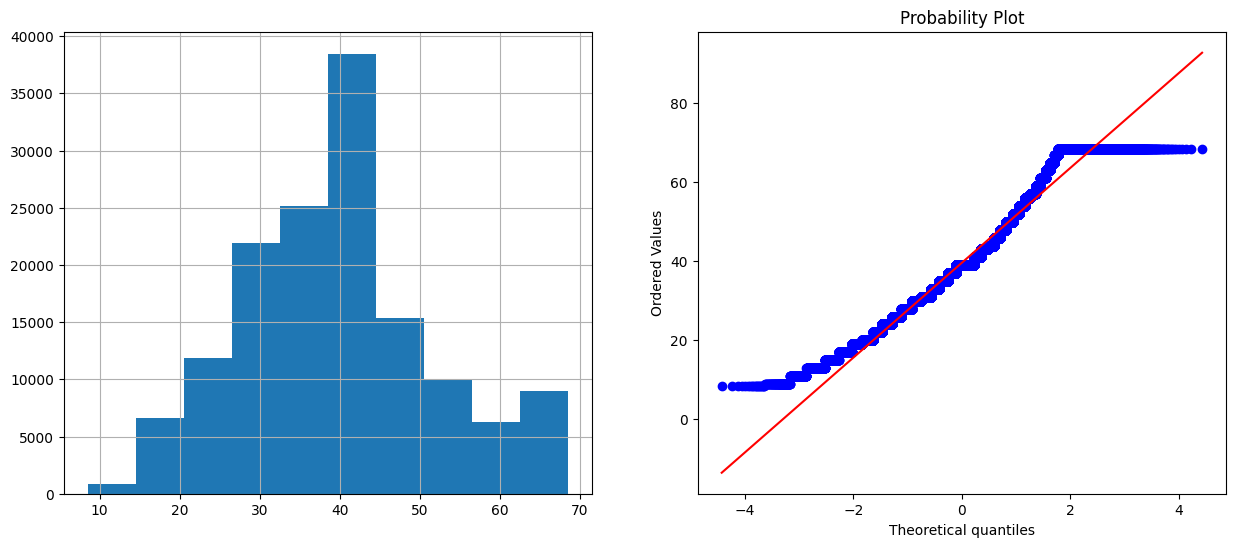

WindSpeed9am


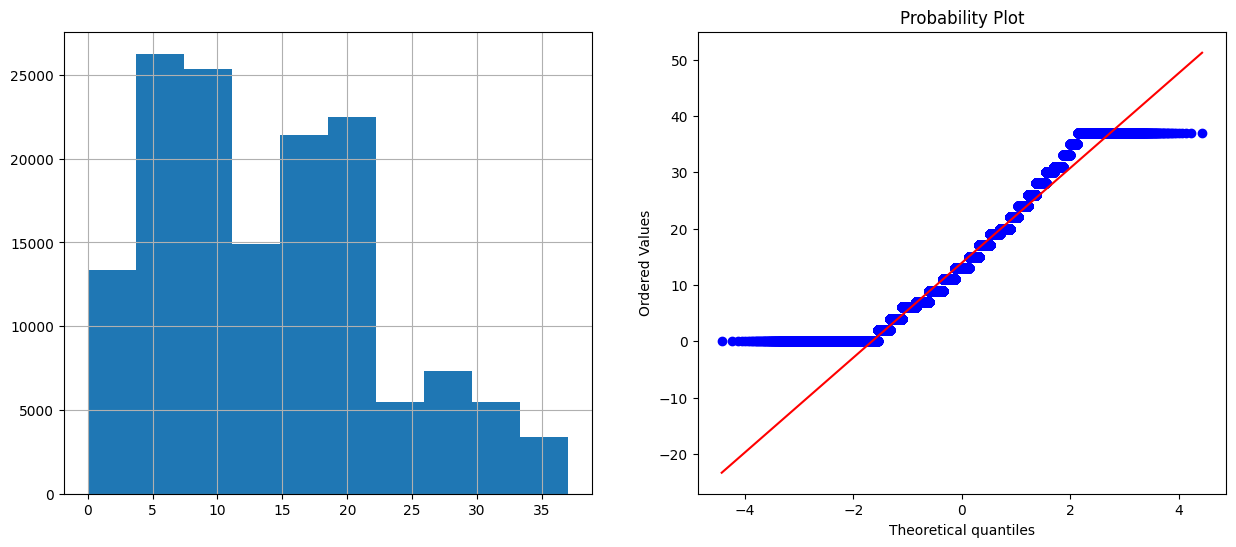

WindSpeed3pm


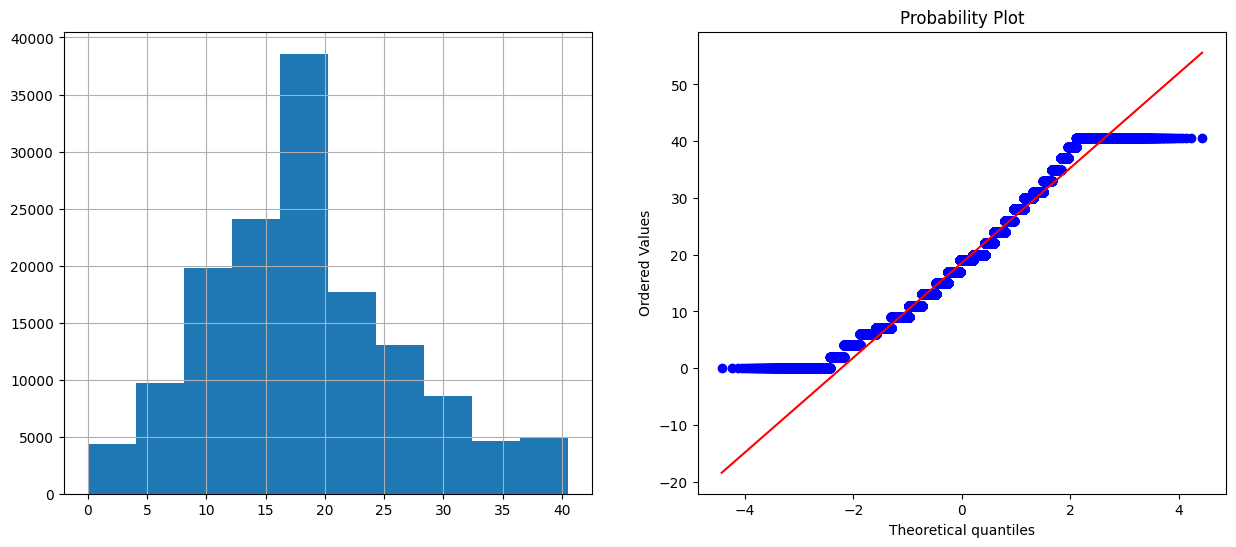

Humidity9am


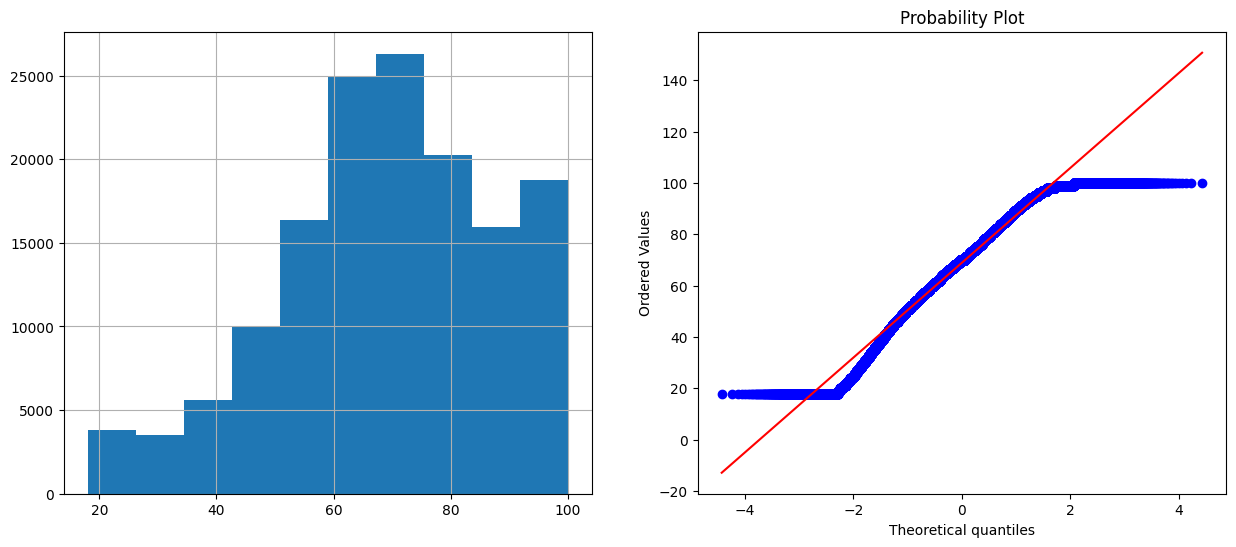

Humidity3pm


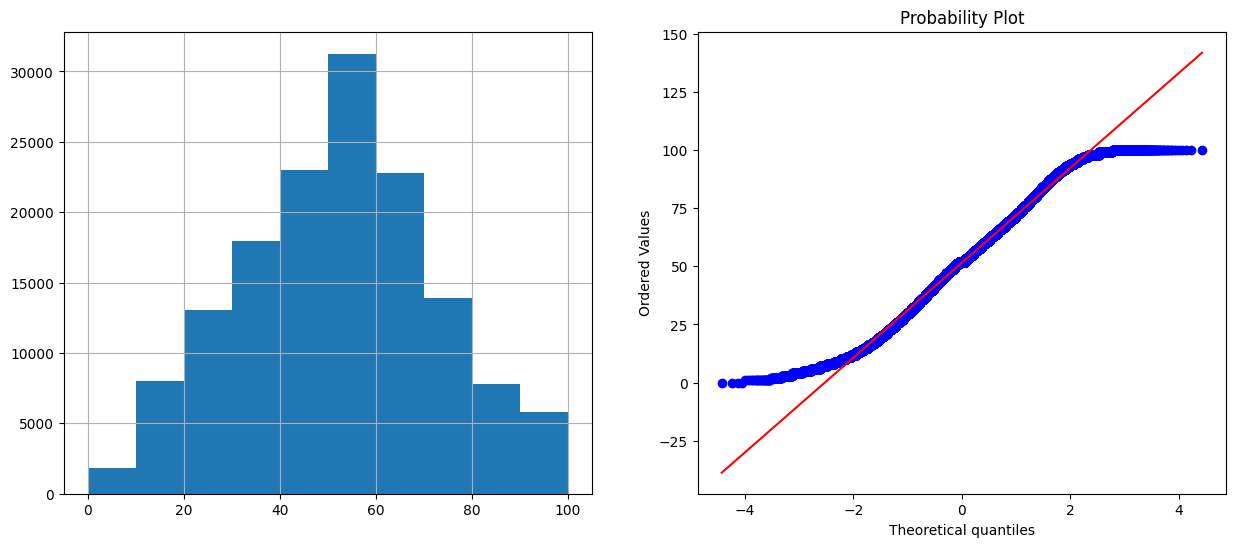

Pressure9am


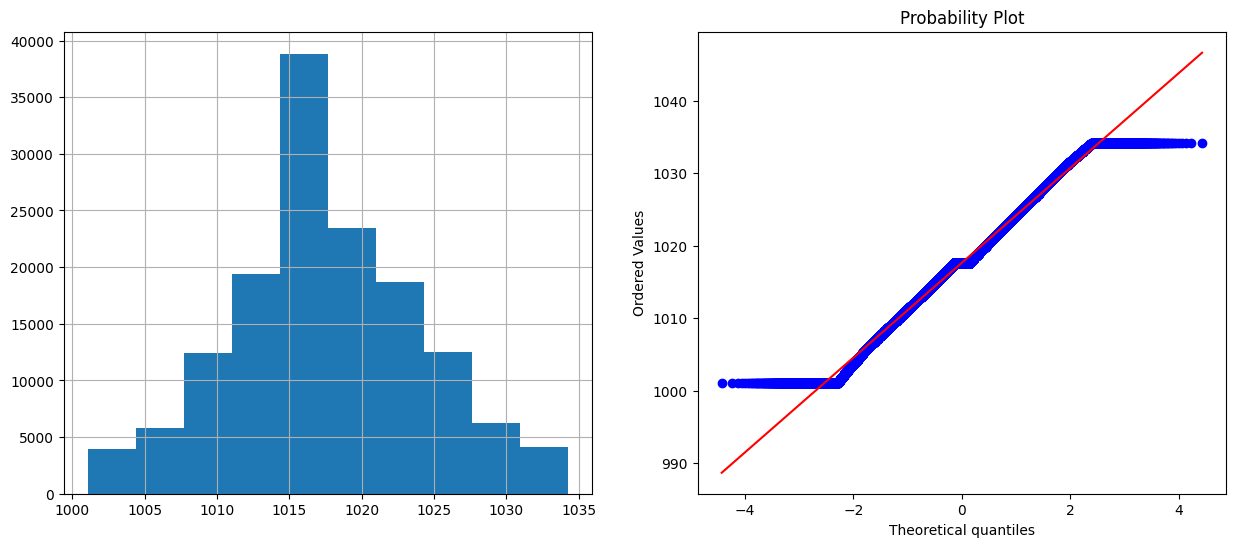

Pressure3pm


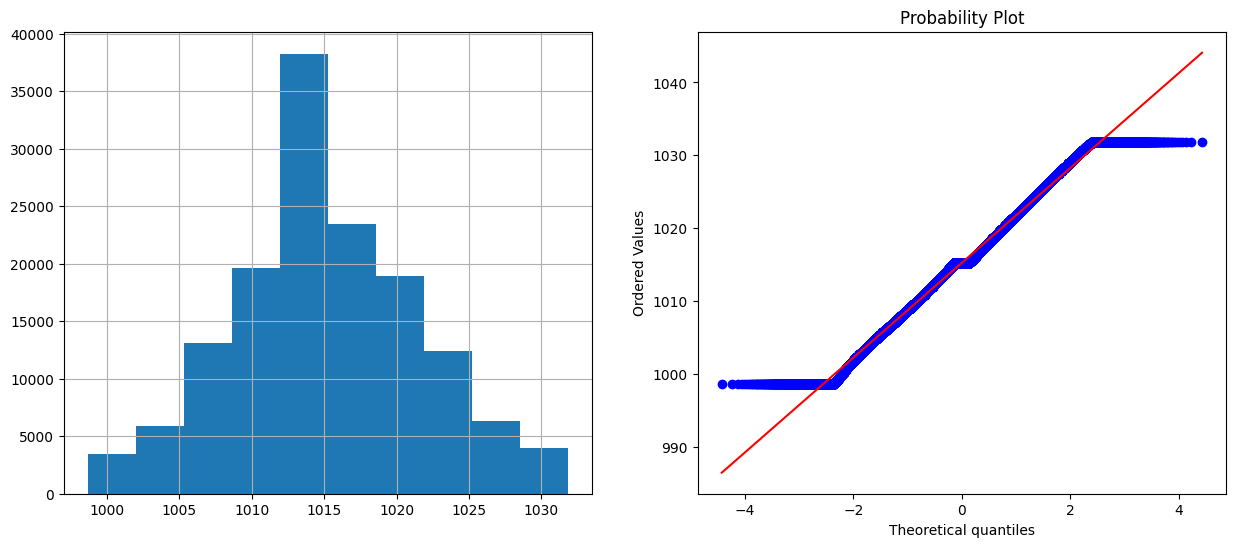

Temp9am


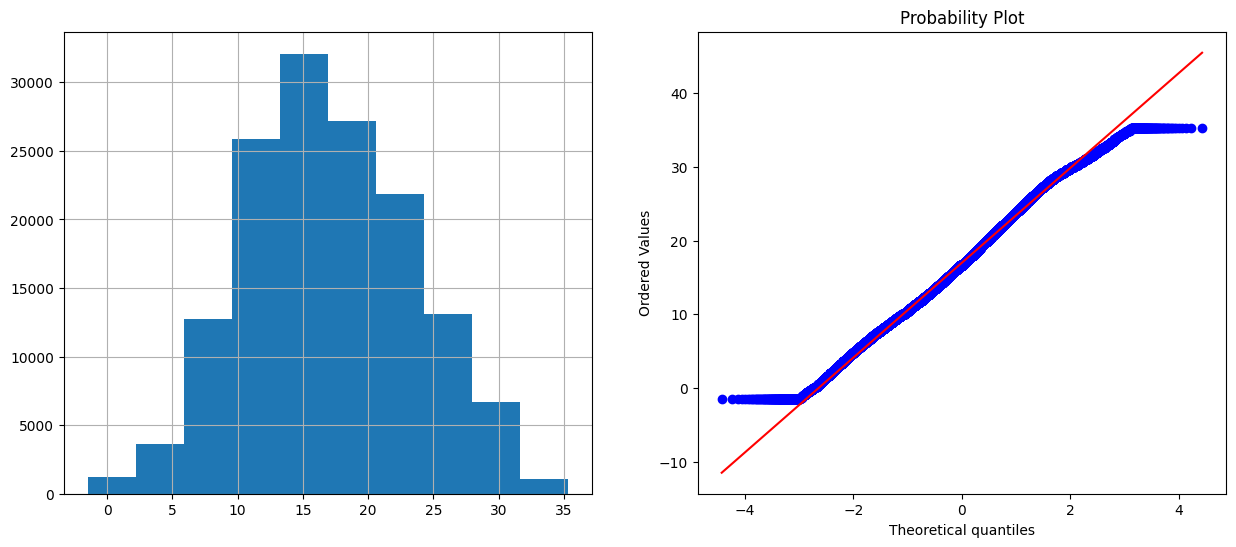

Temp3pm


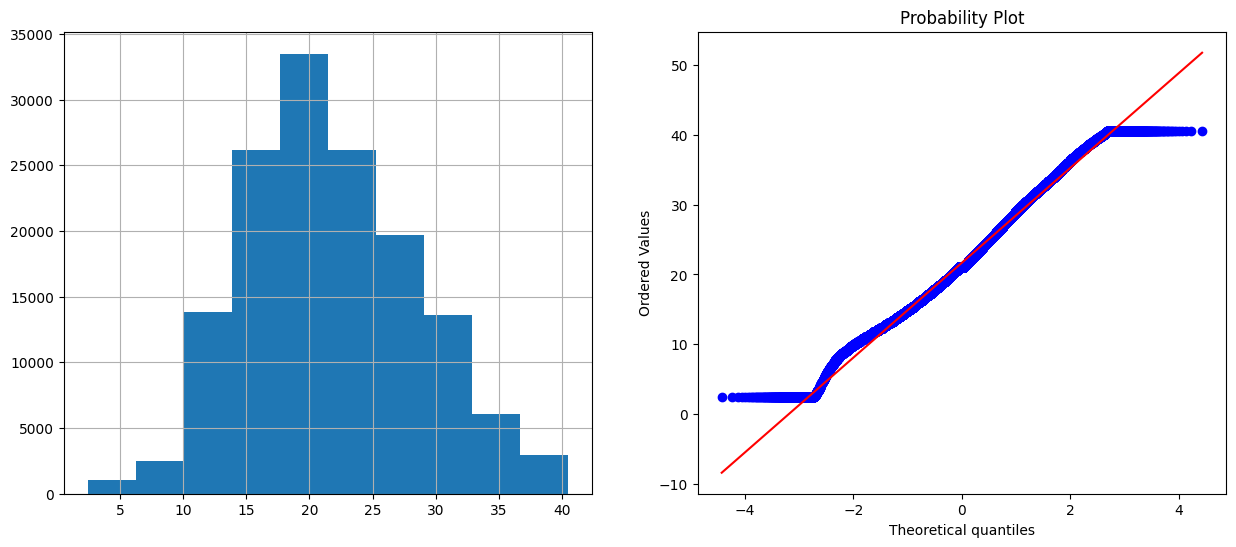

In [58]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

#### Pie Chart ####

In [59]:
a = df['RainToday'].value_counts()
b = df['RainTomorrow'].value_counts()

(-1.0999999873951039, 1.099999913541409, -1.09999995661855, 1.0999999979342168)

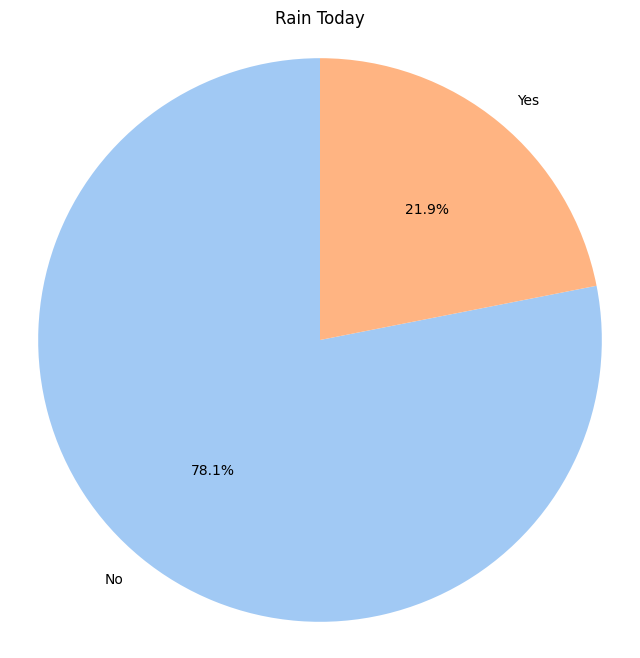

In [60]:
labels = ['No', 'Yes']
sizes = [a[False], a[True]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Rain Today')
plt.axis('equal')


(-1.0999999874229807,
 1.0999999136479504,
 -1.0999999567086018,
 1.099999997938505)

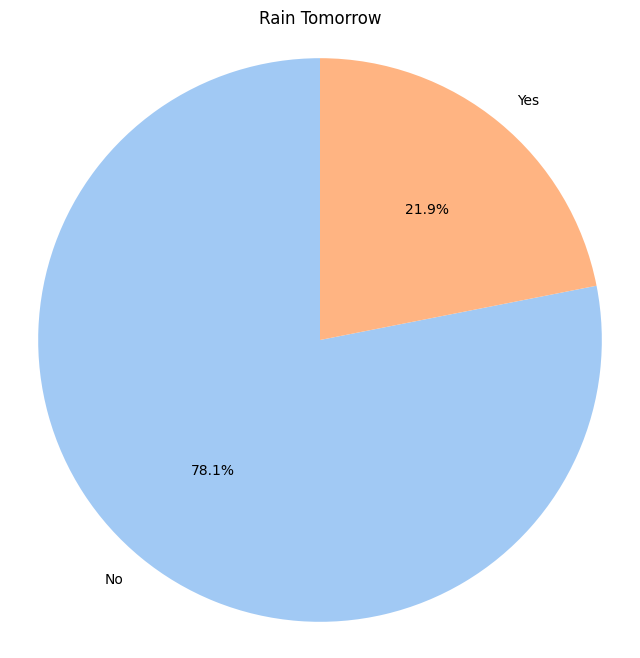

In [61]:
labels = ['No', 'Yes']
sizes = [b[False], b[True]]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Rain Tomorrow')
plt.axis('equal')


#### Bar Graph showing the count of Rain tomorrow

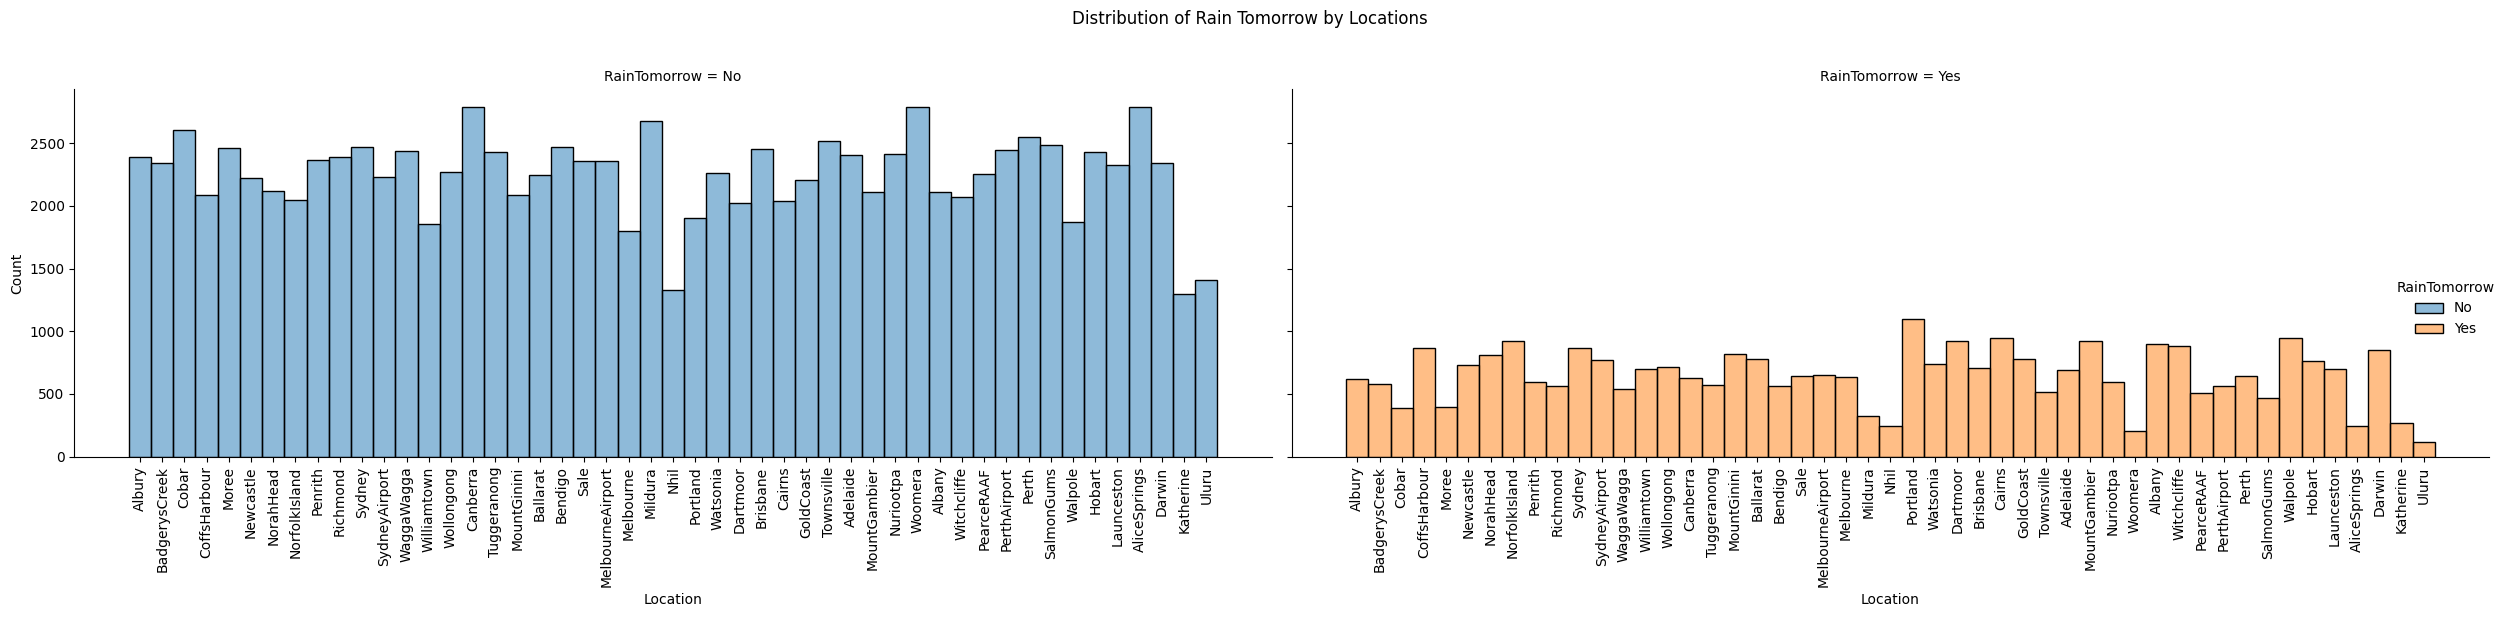

In [62]:
g = sns.displot(data=original_df, x='Location', hue='RainTomorrow', col='RainTomorrow', height=6, aspect=2)
g.set_xticklabels(rotation=90)
g.fig.suptitle('Distribution of Rain Tomorrow by Locations', y=1.02)
plt.tight_layout()

####  Pair plot the training dataset to determine the optimal collection of features for explaining a connection between two variables or for forming the most distinct clusters.

In [63]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0        30     13.4     22.9       0.6          2.4       8.3          4.0   
1        30      7.4     25.1       0.0          3.6      10.0          2.0   
2        30     12.9     25.7       0.0          2.6       4.4          5.0   
3        30      9.2     28.0       0.0         14.6       8.9         11.0   
4        30     17.5     32.3       1.0          5.4       3.0          4.0   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0         5.0         3.0          20.0          24.0   
1           44.0         0.0         6.0           4.0          22.0   
2           46.0         5.0         6.0          19.0          26.0   
3           24.0        13.0        14.0          11.0           9.0   
4           41.0        12.0         0.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       0.0   
1         44.0         25.0       1010.6       1007.8       7.0       1.0   
2         38.0         30.0       1007.6       1008.7       8.0       2.0   
3         45.0         16.0       1017.6       1012.8       0.0       5.0   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Date_month  
0     16.9     21.8      False         False          12  
1     17.2     24.3      False         False          12  
2     21.0     23.2      False         False          12  
3     18.1     26.5      False         False          12  
4     17.8     29.7      False         False          12

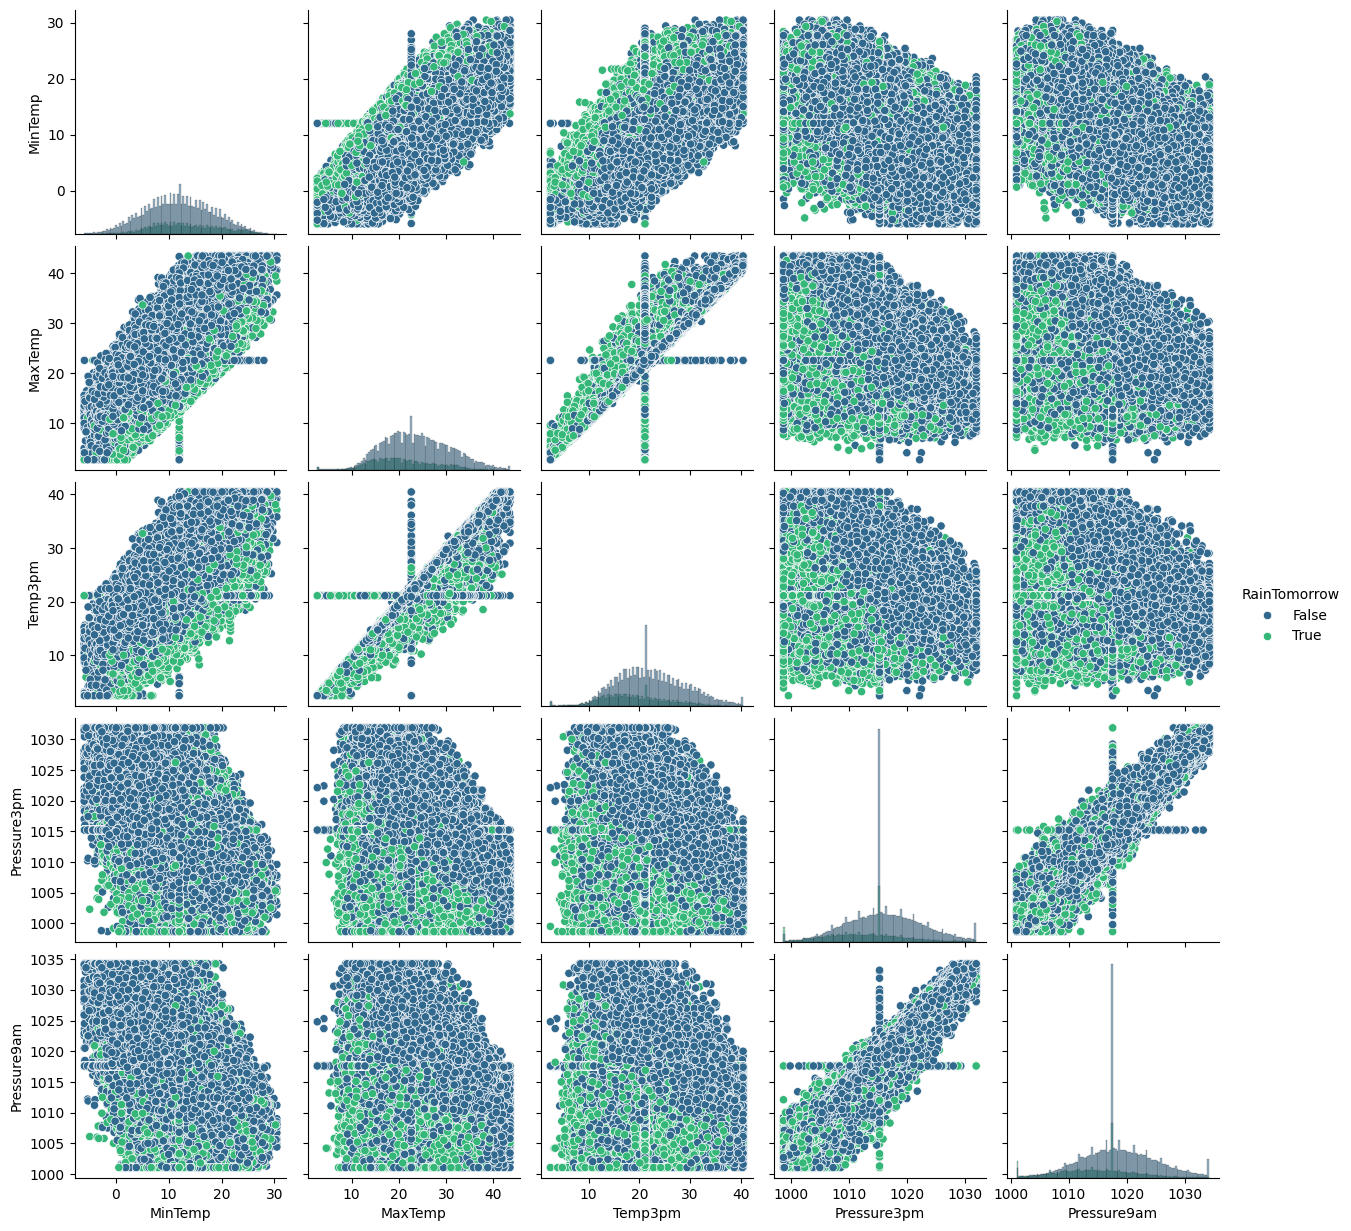

In [70]:
sns.pairplot(data=df[['MinTemp', 'MaxTemp', 'Temp3pm', 'Pressure3pm', 'Pressure9am', 'RainTomorrow']], hue='RainTomorrow',palette='viridis',diag_kind='hist')
# df.columns

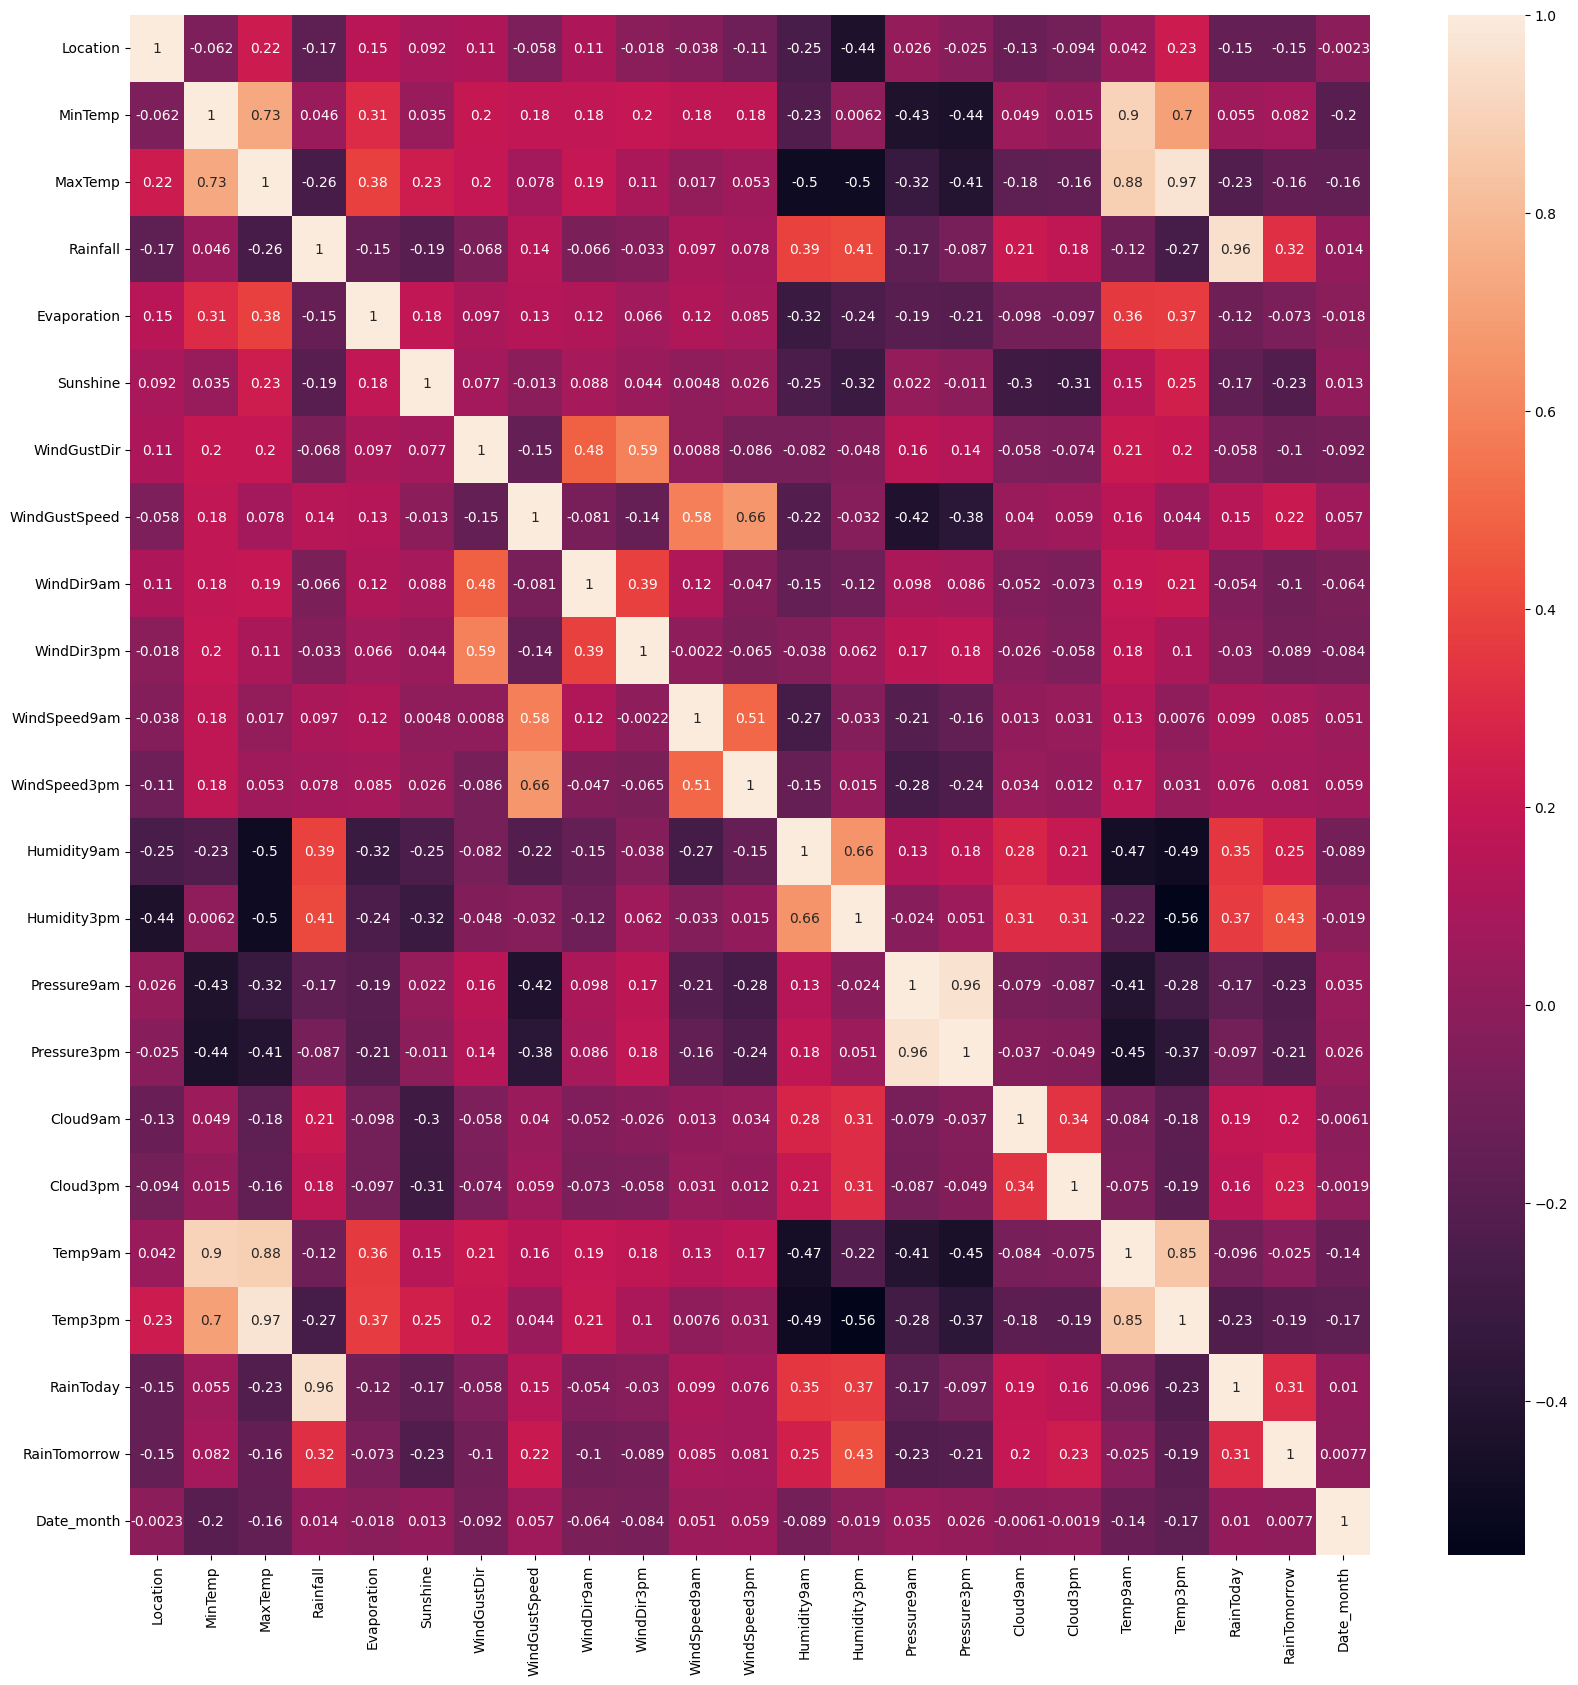

In [71]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [72]:
df.to_csv("preprocessed.csv", index=False)